In [217]:
pip install kagglehub

In [218]:
import kagglehub

kagglehub.login()

In [219]:
import kagglehub

# Download the latest version.
kagglehub.model_download('google/bert/tensorFlow2/answer-equivalence-bem')

# Download a specific version.
kagglehub.model_download('google/bert/tensorFlow2/answer-equivalence-bem/1')

# Download a single file.
kagglehub.model_download('google/bert/tensorFlow2/answer-equivalence-bem', path='variables/variables.index')

# Download a model or file, even if previously downloaded to cache.
kagglehub.model_download('google/bert/tensorFlow2/answer-equivalence-bem', force_download=True)


100%|██████████| 3.68k/3.68k [00:00<00:00, 4.73MB/s]



  0%|          | 0.00/420M [00:00<?, ?B/s]



  0%|          | 0.00/1.56M [00:00<?, ?B/s]
  0%|          | 1.00M/420M [00:00<01:16, 5.71MB/s]

 64%|██████▍   | 1.00M/1.56M [00:00<00:00, 4.75MB/s]
100%|██████████| 1.56M/1.56M [00:00<00:00, 5.95MB/s]

  2%|▏         | 9.00M/420M [00:00<00:14, 28.9MB/s]
  4%|▎         | 15.0M/420M [00:00<00:10, 39.8MB/s]
  5%|▍         | 20.0M/420M [00:00<00:09, 42.7MB/s]
  7%|▋         | 31.0M/420M [00:00<00:06, 63.9MB/s]
  9%|▉         | 38.0M/420M [00:00<00:06, 64.3MB/s]
 12%|█▏        | 49.0M/420M [00:00<00:05, 76.2MB/s]
 14%|█▍        | 59.0M/420M [00:01<00:04, 83.6MB/s]
 16%|█▌        | 68.0M/420M [00:01<00:04, 78.3MB/s]
 18%|█▊        | 76.0M/420M [00:01<00:05, 68.0MB/s]
 20%|██        | 85.0M/420M [00:01<00:04, 73.9MB/s]
 22%|██▏       | 93.0M/420M [00:01<00:05, 60.2MB/s]
 24%|██▍       | 100M/420M [00:01<00:06, 48.5MB/s] 
 25%|██▌       | 106M/420M [00:02<00:07, 45.7MB/s]
 26%|██▋       | 111M/420M [00:02<00:07, 44.9MB/s]
 28%|██▊       | 116M/420M [00:02<00:07, 43.5MB/s]
 30%|██▉       | 

'/root/.cache/kagglehub/models/google/bert/tensorFlow2/answer-equivalence-bem/1'

In [220]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("murderaccountability/homicide-reports")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/murderaccountability/homicide-reports/versions/1


In [221]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
murderaccountability_homicide_reports_path = kagglehub.dataset_download('murderaccountability/homicide-reports')
abrahamanderson_us_cities_dataset_path = kagglehub.dataset_download('abrahamanderson/us-cities-dataset')
omertzadok_states_shapefile_path = kagglehub.dataset_download('omertzadok/states-shapefile')

print('Data source import complete.')


Data source import complete.


# Import Packages

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
import datetime
import scipy.stats as ss
from itertools import product, combinations
import geopandas as gpd
import pdb
from itertools import combinations
import plotly.express as px

# Functions

In [223]:
def count_plot(df, col, hue_col=None, custom_title=None, order=None, labels=True, percent=False):
  fig, ax = plt.subplots(figsize = (8,6))

  if percent:
    df = (df.groupby(col).count().iloc[:,0] / df.groupby(col).count().iloc[:,0].sum() * 100).reset_index()
    df.rename(columns= {'Record ID': '%'}, inplace=True)
    plt.ylabel("%")
    plt
  else:
    plt.ylabel("count")

  if hue_col is None:
    ax = sns.countplot(x=df[col], palette='Set2', order=order)
  else:
    ax = sns.countplot(x=df[col], hue=df[hue_col], palette='Set2', order=order )



  if custom_title is None:
    plt.title(col)
  else:
    plt.title(custom_title)
  if labels:
    for p in ax.patches:
      ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
  plt.xticks(rotation=90)
  plt.show()

In [224]:
def hist_plot(df,col,hue_col=None,custom_title=None):
  fig, ax = plt.subplots(figsize = (8,6))
  if hue_col is None:
    ax = sns.histplot(x=df[col], palette='Set2',kde=True)
  else:
    ax = sns.histplot(x=df[col], hue=df[hue_col], palette='Set2' ,kde=True)

  plt.ylabel("count")

  if custom_title is None:
    plt.title(f'{col} distribution')
  else:
    plt.title(custom_title)

In [225]:
def cross_table_heatmap(data, col1, col2, annot=True, figsize=(18,8)):
    print(f"Cross-Table of Incidents in {col1} by {col2}: LHS: Frequency, RHS: Normalized\n")
    plt.figure(figsize=figsize)
    plt.subplot(221)
    ct1 = pd.crosstab(columns=data[col1],index=data[col2])
    g1 = sns.heatmap(ct1, annot=annot, fmt='.6g',cmap="viridis")
    g1.tick_params(axis='x', rotation=90)
    plt.subplot(222)
    ct2 = pd.crosstab(columns=data[col1],index=data[col2],
                normalize='index')
    g2 = sns.heatmap(ct2, annot=annot, fmt='.3g',cmap="viridis")
    g2.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

In [226]:
def bar_plot_percentage(df, col1, col2, title=None):
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.style.use('fivethirtyeight')
    sns.set_style('darkgrid')

    df1 = df.groupby(col1)[col2].value_counts(normalize=True) * 100
    df1 = df1.rename('percent').reset_index()

    plt.figure(figsize=(12, 8))
    g = sns.barplot(x=col1, y='percent', hue=col2, data=df1, palette='Set2')
    g.set_ylim(0, 100)

    for p in g.patches:
        txt = f"{round(float(p.get_height()), 2)}%"
        txt_x = p.get_x() + p.get_width() / 2
        txt_y = p.get_height()
        g.text(txt_x, txt_y, txt, ha='center', va='bottom', fontsize=10)

    plt.xlabel(col1, fontsize=16)
    plt.ylabel('%', fontsize=16)
    g.tick_params(axis='x', rotation=45)
    plt.legend(title=col2)
    sns.move_legend(g, bbox_to_anchor=(1, 1.01), loc='upper left')

    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.title(title, fontsize=20, fontweight="bold")
    plt.tight_layout()
    plt.show()


In [227]:
def interactive_plot_bar(df, name, vals):
    dff = pd.crosstab(df[name], df[vals])
    dff = dff.reset_index()
    dff.iloc[:, 1:] = dff.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    dff['sum'] = dff.iloc[:, 1:].sum(axis=1)
    dff = dff.sort_values('sum', ascending=False).drop('sum', axis=1)
    fig = px.bar(
        dff,
        x=name,
        y=list(dff.columns[1:]),
        title=f"Analysis of {name} used by {vals}",
        width=1100,
        height=700
    )
    fig.show()

In [228]:
def generate_pie_chart(names, values, title=None):

  fig = px.pie(names=names,
              values=values,
              title=title, width= 800, height=800)

  fig.update_traces(textinfo='label+percent',
                    textfont_size=10,
                    pull=[0.1],
                    insidetextorientation='radial',
                    legendgroup='show',
                    marker = dict(colors=px.colors.qualitative.Set2))
  fig.show()

In [229]:
def time_trend(df, time_col, grp_col, normalize=False, top_bottom=None, n_items=None, custom_title=None):

  if top_bottom == 'top':
    top_df = df.groupby(grp_col)['Record ID'].sum().reset_index()
    top_df = top_df.sort_values('Record ID').tail(n_items)
    top_list = top_df[grp_col].to_list()
    df = df[df[grp_col].isin(top_list)]
  elif top_bottom == 'bottom':
    bottom_df = df.groupby(grp_col)['Record ID'].sum().reset_index()
    bottom_df = bottom_df.sort_values('Record ID').head(n_items)
    bottom_list = bottom_df[grp_col].to_list()
    df = df[df[grp_col].isin(bottom_list)]

  grouped_df = df.groupby([time_col,grp_col])['Record ID'].count().reset_index()

  if time_col == 'Month':
    grouped_df = grouped_df.sort_values('Month', key = lambda x : pd.to_datetime(x, format='%B').dt.month)

  if not normalize:
    fig=px.line(grouped_df, x=time_col, y='Record ID', color=grp_col,
                title=f'Time trend of Homicides count per {grp_col}',
                labels={'Record ID':'Records count'})
    fig.update_xaxes(dtick='M24',tickangle=45)

  else:
    grouped_df_max = grouped_df.groupby(grp_col)['Record ID'].max()
    grouped_df = grouped_df.merge(grouped_df_max, on=grp_col, suffixes=['','_max'])
    grouped_df['Normalized records count'] = grouped_df['Record ID']/grouped_df['Record ID_max']
    fig=px.line(grouped_df, x=time_col, y='Normalized records count', color=grp_col,
                title=f'Time trend of normalized homicides count per {grp_col}')
    fig.update_xaxes(dtick='M24',tickangle=45)

  if custom_title is not None:
    fig.update_layout(title_text=custom_title)
  fig.show()

In [230]:
def multi_cols_ct_bar_plots(data,col,ind,cols=[], ct_heatmap=True):
    """
        col is the column you wish to create ct heatmap
        ind is the x axis of the ct heatmap and barplot
        cols are the hue distribution on the barplot where yaxis is in percentage
    """

    if ct_heatmap:
      print(f"<---Cross-table heatmap of {col}: totals&norm--->\n")
      plt.figure(figsize=(20,14))
      plt.subplot(221)
      ct1 = pd.crosstab(columns=data[ind],index=data[col])
      sns.heatmap(ct1, annot=True, fmt='.6g',cmap="viridis", vmax=2500, vmin=0)
      plt.subplot(222)
      ct2 = pd.crosstab(columns=data[ind],index=data[col],
                  normalize='index')
      sns.heatmap(ct2, annot=False, fmt='.6g',cmap="viridis", vmax=0.4, vmin=0)
      plt.show()

    print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    print(f"<<--barplots of amount in % Vs. {ind} for various:{cols}-->>")
    sns.set(style="darkgrid")
    m, n = len(cols), 1
    plt.figure(figsize=(20,30))

    for i, col in enumerate(cols, 1):
        dat = data.groupby(ind)[col].value_counts(normalize=True).mul(100).rename('%').reset_index()
        plt.subplot(m, n, i) # this line adds sub-axes
        ax1 = sns.barplot(hue=col, y='%', x=ind, data =dat)
        plt.legend(title=col)
        sns.move_legend(ax1, bbox_to_anchor=(1, 1.01), loc='upper left')

        plt.title(f"Unsolved cases of minor victims distributed by: {col}",
                  fontweight="bold", fontdict={'fontsize': 30})
        plt.xticks(rotation=45)
        plt.ylim([0, 100])
        plt.tick_params(axis='both', which='major', labelsize=20)

        plt.xlabel(ind, fontsize=20);
        plt.ylabel('%', fontsize=20);
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [231]:
def us_state_city_map_incidents(df_usmap, scale=5, norm=False):
  df_usamap = df_usmap.copy()
  if norm:
    df_usamap['count'] = df_usamap['count'] / df_usamap['population']
    title = 'Distribution of Homicide Incidents across US States and Cities Normalized by Population'
    conditions = [
      (df_usamap['count'] < 0.01),
      (df_usamap['count'] >= 0.01) & (df_usamap['count'] < 0.1),
      (df_usamap['count'] >= 0.1) & (df_usamap['count'] < 0.5),
      (df_usamap['count'] >= 0.5) & (df_usamap['count'] < 1),
      (df_usamap['count'] >= 1)
      ]
    ranges = ['<' + str(0.01),
              str(0.01) + '-' + str(0.1),
              str(0.1) + '-' + str(0.5),
              str(0.5) + '-' + str(1),
              '>' + str(1)]

  else:
    conditions = [
        (df_usamap['count'] < 100),
        (df_usamap['count'] >= 100) & (df_usamap['count'] < 500),
        (df_usamap['count'] >= 500) & (df_usamap['count'] < 1000),
        (df_usamap['count'] >= 1000) & (df_usamap['count'] < 10000),
        (df_usamap['count'] >= 10000)
    ]
    ranges = ['<100', '100-500', '500-1000', '1000-10000', '>10000']
    title = 'Distribution of Homicide Incidents across US States and Cities'

  colors = ["royalblue","deeppink","lime","gold","tomato"]

  df_usamap['color'] = np.select(conditions,colors)

  df_usamap['text'] = "State: " + df_usamap['state_name'] + '<br>City: ' + \
  df_usamap['city'] + '<br>Population: ' + (df_usamap['population'].astype(str)) +\
  '<br>Incidents: ' + (df_usamap['count'].astype(str))

  fig = go.Figure()
  scale = scale
  for i in range(len(conditions))[::-1]:
    mask = conditions[i]
    df_count = df_usamap[mask]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_count['lng'],
        lat = df_count['lat'],
        text = df_count['text'],

        marker = dict(
            size = df_count["count"] / scale,
            color = df_count['color'].value_counts().index.to_list()[0],
            line_color='rgb(100,100,100)',
            line_width=0,
            sizemode = 'area',
            opacity=0.5,
            reversescale=True,
            ),
        name = '{0}'.format(ranges[i])
        ),

        )

  fig.update_layout(
          title_text = title,
          showlegend = True,
          legend_itemsizing = 'constant',
          legend_title_text = 'Incidents Range',
          legend_title_side = 'top',
          geo = dict(
              scope = 'usa',
              landcolor = 'rgb(217, 217, 217)',
              )
          )

  fig.show()

In [232]:
def norm_df_by_feature(data_total, data_part,  feature, figure=False):
  """
  Inputs:
  data_total denotes for the total cases (Unsolved + Solved)
  data_part denotes for the Unsolved Crime cases
  feature - a feature (string) for presentation.

  This function normalize each feature of unsolved case with its correspoinding
  total case.

  Output: bar plot of the normalized feature.
  """
  df_partial = data_part.groupby(feature).size().reset_index().rename(columns={0:'Crime Unsolved'})
  df_tot = data_total.groupby(feature).size().reset_index().rename(columns={0:'Total'})
  df_normalize = df_tot.merge(df_partial, how='inner', on=feature)
  # Normalizing unsolved case for feature 0 in the ith combination by the total corresponding feature for the entire population
  df_normalize['Ratio of Crime Unsolved by ' + feature] = np.round(df_normalize['Crime Unsolved'] / df_normalize['Total'],2)

  if (feature == 'Victim Age Groups') | (feature == 'Perpetrator Age Groups'):
    data_total[feature] = data_total[feature].map(str)
    data_part[feature] = data_part[feature].map(str)
    df_normalize[feature] = df_normalize[feature].map(str)

  if figure:
    fig = px.bar(df_normalize, x=feature, y='Ratio of Crime Unsolved by ' + feature, color=feature,
             orientation="v", text_auto=True,
             hover_name=feature, color_discrete_sequence=[
                 x for x in px.colors.qualitative.Plotly
                 ],
            #  text=['.2f' (round(v,2)) for v in df_normalize['Ratio of Crime Unsolved by ' + feature]],
             width= 1000, height=600,
             title='Distribution of ' + feature + ' of the Unsolved Crimes Normalized by the corresponding Total Cases' ,
             )
    fig.update_traces(showlegend=False, text=df_normalize['Ratio of Crime Unsolved by ' + feature], textposition='outside',)
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.show()
  return df_normalize, df_tot

In [233]:
def propability_of_multi_feature(df_total, df_unsolved_crime, n_features, annot=True, figsize=(30, 24)):
    """
    Analyzes probabilities of combinations of multiple features for unsolved crimes.
    Outputs heatmaps for each feature combination.
    """
    plt.figure(figsize=figsize)
    plt.subplots_adjust(hspace=0.1, wspace=0.5)
    plt.suptitle("The probability that two features occurred for the cases of unsolved crimes",
                 fontsize=30, y=1.05)

    feat_combo = list(combinations(n_features, 2))
    for i, feat in enumerate(feat_combo):
        # First feature in the ith combination
        df_norm1, df_tot1 = norm_df_by_feature(df_total, df_unsolved_crime, feat[0], figure=False)

        # Second feature in the ith combination
        df_norm2, df_tot2 = norm_df_by_feature(df_total, df_unsolved_crime, feat[1], figure=False)

        # Calculating the probability of the two ith combination features
        v1 = np.array(df_norm1['Ratio of Crime Unsolved by ' + feat[0]]).reshape(-1, 1)
        v2 = np.array(df_norm2['Ratio of Crime Unsolved by ' + feat[1]]).reshape(1, -1)
        ct = np.round(pd.DataFrame(v1 @ v2), 3)

        # Updating axes without inplace
        ct = ct.set_axis(df_norm1[feat[0]].values, axis='index')
        ct = ct.set_axis(df_norm2[feat[1]].values, axis='columns')

        # Plotting
        plt.subplot(len(feat_combo), 2, i + 1)
        cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
        ax = sns.heatmap(ct, annot=annot, fmt='.6g', cmap=cmap, annot_kws={
            'fontsize': 20,
            'fontweight': 'bold',
            'fontfamily': 'serif'
        })
        ax.set_title(f'{i+1}). Propbaility of {feat[0]} and {feat[1]}',
                     fontdict={'size': 26, 'weight': 'bold', 'color': 'blue'})
        plt.xticks(fontsize=22, rotation=90)
        plt.yticks(fontsize=22, rotation=0)
        ax.xaxis.label.set_fontsize(26)
        ax.yaxis.label.set_fontsize(26)
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=20)

    plt.tight_layout(pad=5.0)


# 1 - The Problem Under Investigation









The dataset for this project was acquired from **Kaggle**:
https://www.kaggle.com/datasets/murderaccountability/homicide-reports


It was created and updated by the **'Murder Accountability Project'**:
    
    
*The Murder Accountability Project is a nonprofit group organized in 2015 and dedicated to educate Americans on the importance of accurately accounting for unsolved homicides within the United States. We seek to obtain information from federal, state and local governments about unsolved homicides and to publish this information. The Project’s Board of Directors is composed of retired law enforcement investigators, investigative journalists, criminologists and other experts on various aspects of homicide.*





# 2 - The Data: EDA

### **2.1 Features Initial Overview**

 1. ***Record ID*** - unique index per record
 2. ***Agency Code*** - the code of the agency the crime was performed under its jurisdiction
 3. ***Agency Name*** - name of the agency the crime was performed under its jurisdiction
 4. ***Agency Type*** - the agency type, for example: 'County Police', 'Sherrif' etc.
 5. ***City*** - the city in which the crime was performed
 6. ***State*** - the state in which the crime was performed
 7. ***Year*** - the year on which the crime was performed
 8. ***Month*** - the year on which the crime was performed
 9. ***Incident*** - a unique subsequent number for incidents that happened under same agency code on the same year and month
 10. ***Crime Type*** - can be 'Manslaughter by Negligence' or 'Murder or Manslaughter'
 11. ***Crime Solved*** - a feature flagging if the crime was solved or not
 12. ***Victim Sex*** - the sex of the victim
 13. ***Victim Age*** - the age of the victim
 14. ***Victim Race*** - the race of the victim
 15. ***Victim Ethnicity*** - the ethnicity of the victim
 16. ***Perpetrator Sex*** - the sex of the perpetrator
 17. ***Perpetrator Age*** - the age of the perpetrator
 18. ***Perpetrator Race*** - the race of the perpetrator
 19. ***Perpetrator Ethnicity*** - the ethnicity of the perpetrator
 20. ***Relationship*** - the relationship between the perpetrator and the victim, for example: 'Acquaintance', 'Family' etc.
 21. ***Weapon*** - the weapon by which the crime was excecuted
 22. ***Victim Count*** - the victims count except for the obvious 1, default is 0
 23. ***Perpetrator Count*** - the perpetrators count except for the obvious 1, default is 0
 24. ***Record Source*** - source of the crime record

### **2.2 Data Loading**

In [234]:
data = pd.read_csv('/content/database.csv')
df = data.copy()

### **2.3 Initial Data Examinantion**

In [235]:
df.head()

Record ID Agency Code Agency Name       Agency Type       City   State  \
0          1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1          2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2          3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
3          4     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
4          5     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   

   Year    Month  Incident              Crime Type  ... Victim Ethnicity  \
0  1980  January         1  Murder or Manslaughter  ...          Unknown   
1  1980    March         1  Murder or Manslaughter  ...          Unknown   
2  1980    March         2  Murder or Manslaughter  ...          Unknown   
3  1980    April         1  Murder or Manslaughter  ...          Unknown   
4  1980    April         2  Murder or Manslaughter  ...          Unknown   

  Perpetrator Sex  Perpetrator Age               Perpetrator Race  \
0            Male               15  Native American/Alaska Native   
1            Male               42                          White   
2         Unknown                0                        Unknown   
3            Male               42                          White   
4         Unknown                0                        Unknown   

  Perpetrator Ethnicity  Relationship         Weapon Victim Count  \
0               Unknown  Acquaintance   Blunt Object            0   
1               Unknown  Acquaintance  Strangulation            0   
2               Unknown       Unknown        Unknown            0   
3               Unknown  Acquaintance  Strangulation            0   
4               Unknown       Unknown        Unknown            0   

  Perpetrator Count Record Source  
0                 0           FBI  
1                 0           FBI  
2                 0           FBI  
3                 0           FBI  
4                 1           FBI  

[5 rows x 24 columns]

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

The column 'Perpetrator Age' is wrongly imported as `object`, thus, it's being transformed to `numeric`:

In [237]:
df['Perpetrator Age'] = pd.to_numeric(df['Perpetrator Age'], errors='coerce')

In [238]:
df.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          1
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

No `null` values in the dataset, but a lot of 'Unknown' values due to the nature of the data

In [239]:
df.shape

(638454, 24)

In [240]:
df.duplicated().sum()

0

In [241]:
df.describe().T

count           mean            std     min        25%  \
Record ID          638454.0  319227.500000  184305.938720     1.0  159614.25   
Year               638454.0    1995.801102       9.927693  1980.0    1987.00   
Incident           638454.0      22.967924      92.149821     0.0       1.00   
Victim Age         638454.0      35.033512      41.628306     0.0      22.00   
Perpetrator Age    638453.0      20.322697      17.886842     0.0       0.00   
Victim Count       638454.0       0.123334       0.537733     0.0       0.00   
Perpetrator Count  638454.0       0.185224       0.585496     0.0       0.00   

                        50%        75%       max  
Record ID          319227.5  478840.75  638454.0  
Year                 1995.0    2004.00    2014.0  
Incident                2.0      10.00     999.0  
Victim Age             30.0      42.00     998.0  
Perpetrator Age        21.0      31.00      99.0  
Victim Count            0.0       0.00      10.0  
Perpetrator Count       0.0       0.00      10.0

Some strange values can be seen in the 'Victim Age' (max age 998?) and 'Perpetrator Age' (min age 0?) coulmns, This issue will be further discussed in the age analysis section.

The type of crime is either 'Murder or Manslaughter' or 'Manslaughter by Negligence', with a respective percentages of 98.58% and 1.42%:

In [242]:
df.groupby(['Crime Type'])['Crime Type'].count()

Crime Type
Manslaughter by Negligence      9116
Murder or Manslaughter        629338
Name: Crime Type, dtype: int64

'Victim Count' and 'Perpereator Count' columns represent the additional victims/perperators beyond the obvious 1.

In order to present the data more clearly we'll add 1 to both columns.

In [243]:
df['Perpetrator Count'] = df['Perpetrator Count']+1
df['Victim Count'] = df['Victim Count']+1

Perpetrator and Victim race columns have 2 very long values: *'Native American/Alaska Native'* and *'Asian/Pacific Islander'*

For presentation purposes they will be shortened to *'Native American'* and *'Asian'*

In [244]:
df['Perpetrator Race'].unique()

array(['Native American/Alaska Native', 'White', 'Unknown', 'Black',
       'Asian/Pacific Islander'], dtype=object)

In [245]:
df['Victim Race'].unique()

array(['Native American/Alaska Native', 'White', 'Black', 'Unknown',
       'Asian/Pacific Islander'], dtype=object)

In [246]:
df = df.replace({'Native American/Alaska Native': 'Native American',
                 'Asian/Pacific Islander': 'Asian'})

County Police and Sheriff are similar juridsication

In [247]:
df = df.replace({'County Police': 'Sheriff',
                })

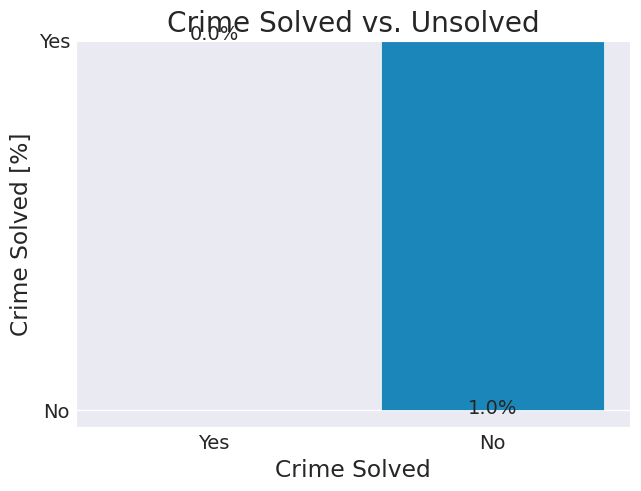

In [248]:
crimes_solved_not = pd.DataFrame(df['Crime Solved'].value_counts(normalize=True)*100)
ax = sns.barplot(data=crimes_solved_not, x=crimes_solved_not.index, y='Crime Solved')
for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}%'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
plt.ylabel('Crime Solved [%]')
plt.title('Crime Solved vs. Unsolved')
plt.show()

Most crimes were solved, approximately 70%, while 30% of them remains unsolved. In the following sections, we will explore the main characteristics of the cases in which the crimes were solved.

### **2.4 Homicides by Gender of Perpetrator and Victim**

**Gender distribution and who killed by who**




In [249]:
pd.crosstab(df['Perpetrator Sex'], df['Victim Sex'], margins=True,normalize=True).applymap(lambda x: '{:.1f}%'.format(round(x*100, 1)))

Victim Sex      Female   Male Unknown     All
Perpetrator Sex                              
Female            1.7%   5.9%    0.0%    7.6%
Male             15.6%  47.0%    0.0%   62.6%
Unknown           5.2%  24.5%    0.1%   29.8%
All              22.5%  77.4%    0.2%  100.0%

We can see that most perpetrators and most victims of solved homicidesare Males, 77.4% and 62.6%,
respectively.

29.8% of the perpetrator sex is unknown as 29.8% of the homicides are unsolved as shown above.

In [250]:
pd.crosstab(df['Perpetrator Sex'], df['Victim Sex'], margins=True)

Victim Sex       Female    Male  Unknown     All
Perpetrator Sex                                 
Female            10869   37629       50   48548
Male              99381  299879      281  399541
Unknown           33095  156617      653  190365
All              143345  494125      984  638454

Just to get a sense of the numbers - 190K of unsolved homicides between 1980 and 2014 in the USA!

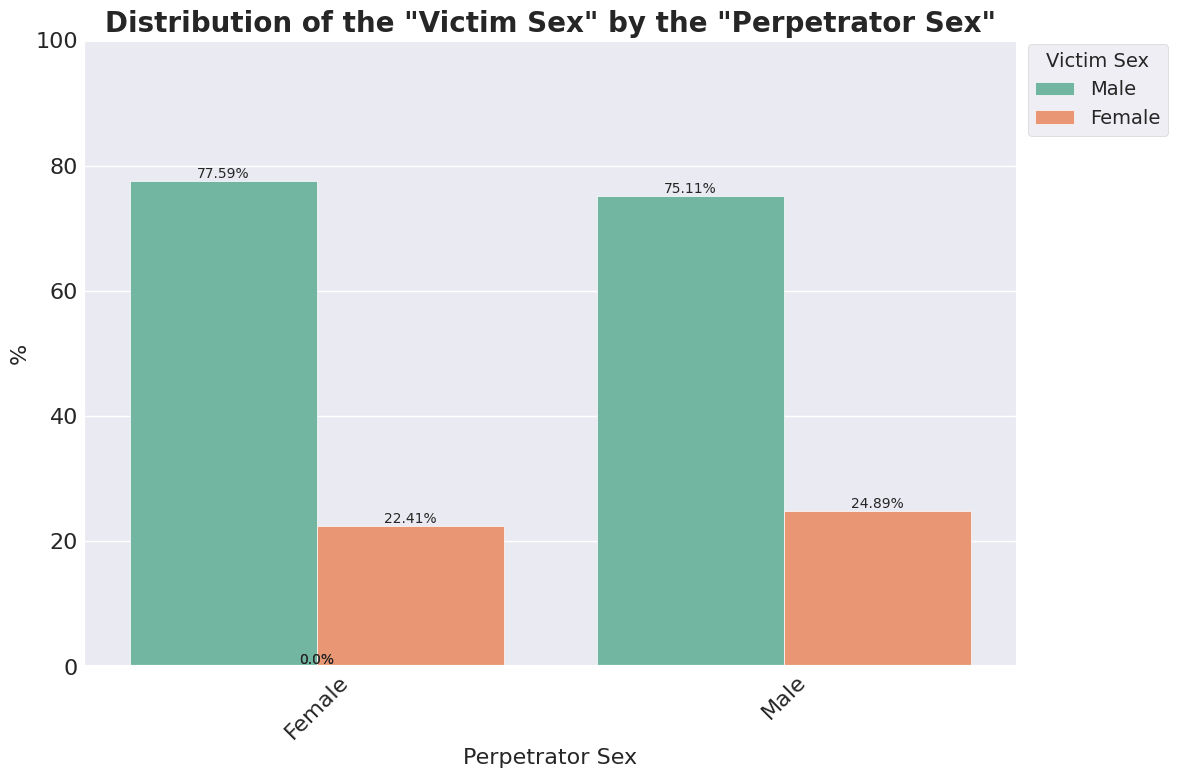

In [251]:
bar_plot_percentage(
    df[(df['Victim Sex'] != 'Unknown') & (df['Perpetrator Sex'] != 'Unknown')],
    'Perpetrator Sex',
    'Victim Sex',
    title='Distribution of the "Victim Sex" by the "Perpetrator Sex"'
)

Looking on the known gender data, both male and female perpetrator have very similar victim sex distribution.

### **2.5 Homicides by Age of Perpetrator and Victim**

Since Victim Age obviously can't be above 120 (and in the table we see a maximum of 998), we deduce that the extreme values on this column are for 'Unknown' cases which will need to be removed in further analysis on Age dependencies.

Same will be done with Perpetrator Age values below 5.

In [252]:
df_known_age = df[(df['Victim Age']<99)&(df['Perpetrator Age']>5)&(df['Victim Sex'] != 'Unknown') & (df['Perpetrator Sex'] != 'Unknown')]

**Victim and Perpetrator age by sex**

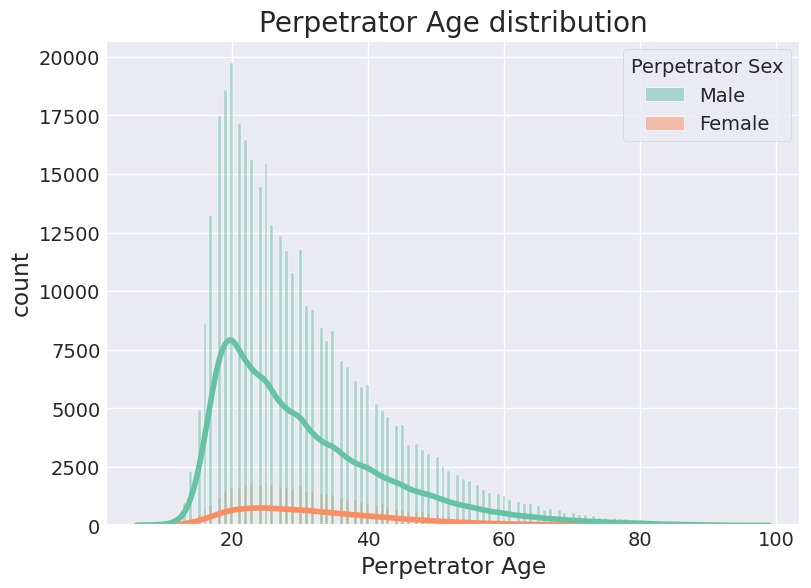

In [253]:
hist_plot(df_known_age,'Perpetrator Age',hue_col='Perpetrator Sex')

Looking at male and female Perpetrator ages we can see the exact same behaviour of a peak around the start of the 20s with a constnat decrease in the count as the perpetrator ages increase.

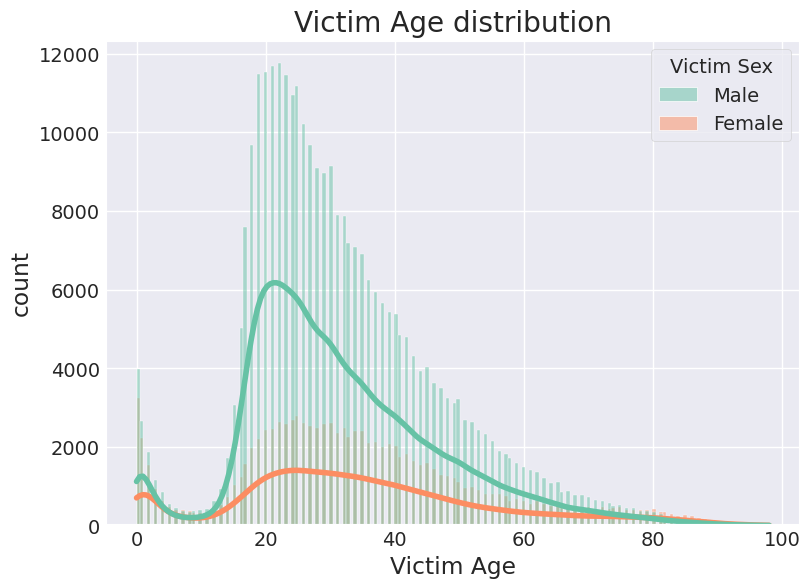

In [254]:
hist_plot(df_known_age,'Victim Age',hue_col='Victim Sex')

It seems that both female and male victims age distibutions are following the same trend - relatively high number of infants which decreases throught youth and reaching a peak at the start of the 20s, from there the count decreases as the victim ages increase until a sharp increase at the end of the 90s.

Let's see if we can identify the root cause of the high infant victims homicides:

In [255]:
df_known_age[df_known_age['Victim Age']==0].groupby(['Relationship'])['Record ID'].count().reset_index().sort_values('Record ID', ascending=False).head(3)

Relationship  Record ID
17          Son       2889
5      Daughter       2469
23      Unknown        815

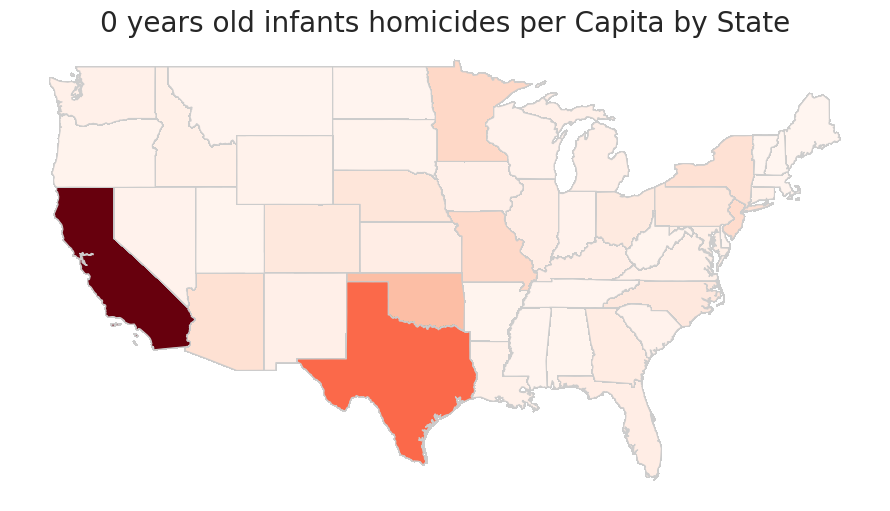

In [256]:
df_known_age_state = df_known_age[df_known_age['Victim Age']==0].groupby(['State'])['Record ID'].count().reset_index()
df_known_age_state['State'] = df_known_age_state['State'].str.upper()
states = gpd.read_file('/content/States_shapefile.shp')
population = pd.read_csv('/content/uscities.csv')[['state_name','population']]
population['state_name'] = population['state_name'].str.upper()
states = states.merge(df_known_age_state, left_on='State_Name', right_on='State')
states = states.merge(population, left_on='State_Name', right_on='state_name')
states['normalized_incidents'] = states['Record ID']/states['population']
states = states[(states['State_Name']!='ALASKA')&(states['State_Name']!='HAWAII')]
fig, ax = plt.subplots(figsize=(10, 8))
states.plot(column='normalized_incidents', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('0 years old infants homicides per Capita by State')
plt.show()

We've found that the state with the highest 0 years old infant homicide rate is California, and that most of the homicides are done by close family members.

The issue is originated by California extreme numbers of baby abandonment in unsafe locations as a result of unplanned pregnancies and past ban on abortions that even led to the ['Safe Surrender Baby'](https://www.cdss.ca.gov/safe-surrender-baby#:~:text=Under%20the%20Safely%20Surrendered%20Baby,within%2072%20hours%20of%20birth.) program initiation. The ban on abortions was removed in California at 2002.

In [257]:
df_known_age['Age Difference'] = df_known_age['Perpetrator Age'] - df_known_age['Victim Age']

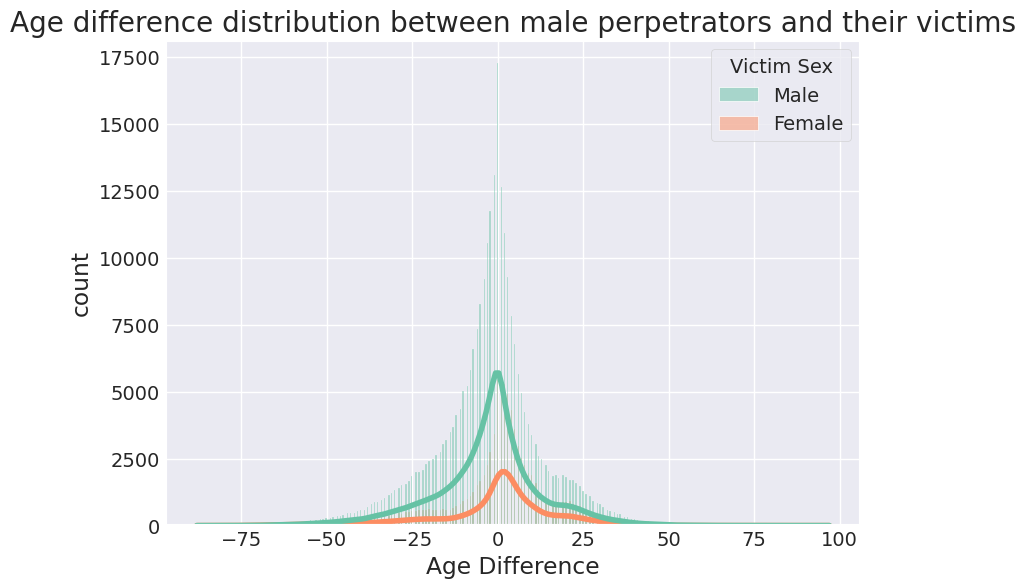

In [258]:
hist_plot(df_known_age[df_known_age['Perpetrator Sex']=='Male'],'Age Difference',hue_col='Victim Sex',
          custom_title='Age difference distribution between male perpetrators and their victims')

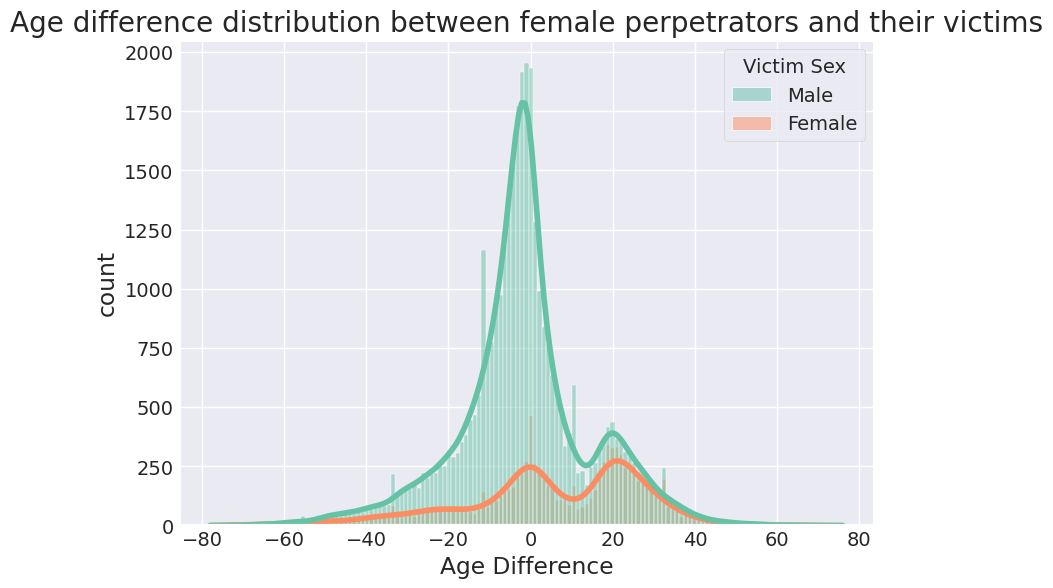

In [259]:
hist_plot(df_known_age[df_known_age['Perpetrator Sex']=='Female'],'Age Difference',hue_col='Victim Sex',
          custom_title='Age difference distribution between female perpetrators and their victims')

It seems that while male perpetrators murder mostly victims of their same age with percentages going down as the victim age differs from their, doesn't matter if its sex is male or female, Female perpetrators see the same behaviour regarding to male victims but have higher tendency to kill female victims younger then them with a peak of age difference of 25.

We'll return to this fact later on when investigation the relationship between perpetrator and his victim.

**Another view of age**

In [260]:
df_age_cut_victim = pd.cut(x=df['Victim Age'], bins=np.arange(0,120,18))
df['Incident_by_agecut'] = 1  # There is a jump of the number of incidents. Some starts 1, 2, 3 ... and some 1, 2, 993, 994..
df_age_cut_victim = df.pivot_table(['Incident_by_agecut'], index=['Victim Sex', df_age_cut_victim], aggfunc=sum)
age_category = ['0-18', '18-36', '36-54', '54-72', '72-90', '90-108']

In [261]:
df_age_cut_victim_female = pd.DataFrame()
for ind, age in enumerate(age_category):
  df_age_cut_victim_female[age] = df_age_cut_victim.iloc[ind]
df_age_cut_victim_female = df_age_cut_victim_female.T

In [262]:
df_age_cut_victim_male = pd.DataFrame()
for ind, age in enumerate(age_category):
  df_age_cut_victim_male[age] = df_age_cut_victim.iloc[ind + len(df_age_cut_victim_female)]
df_age_cut_victim_male = df_age_cut_victim_male.T

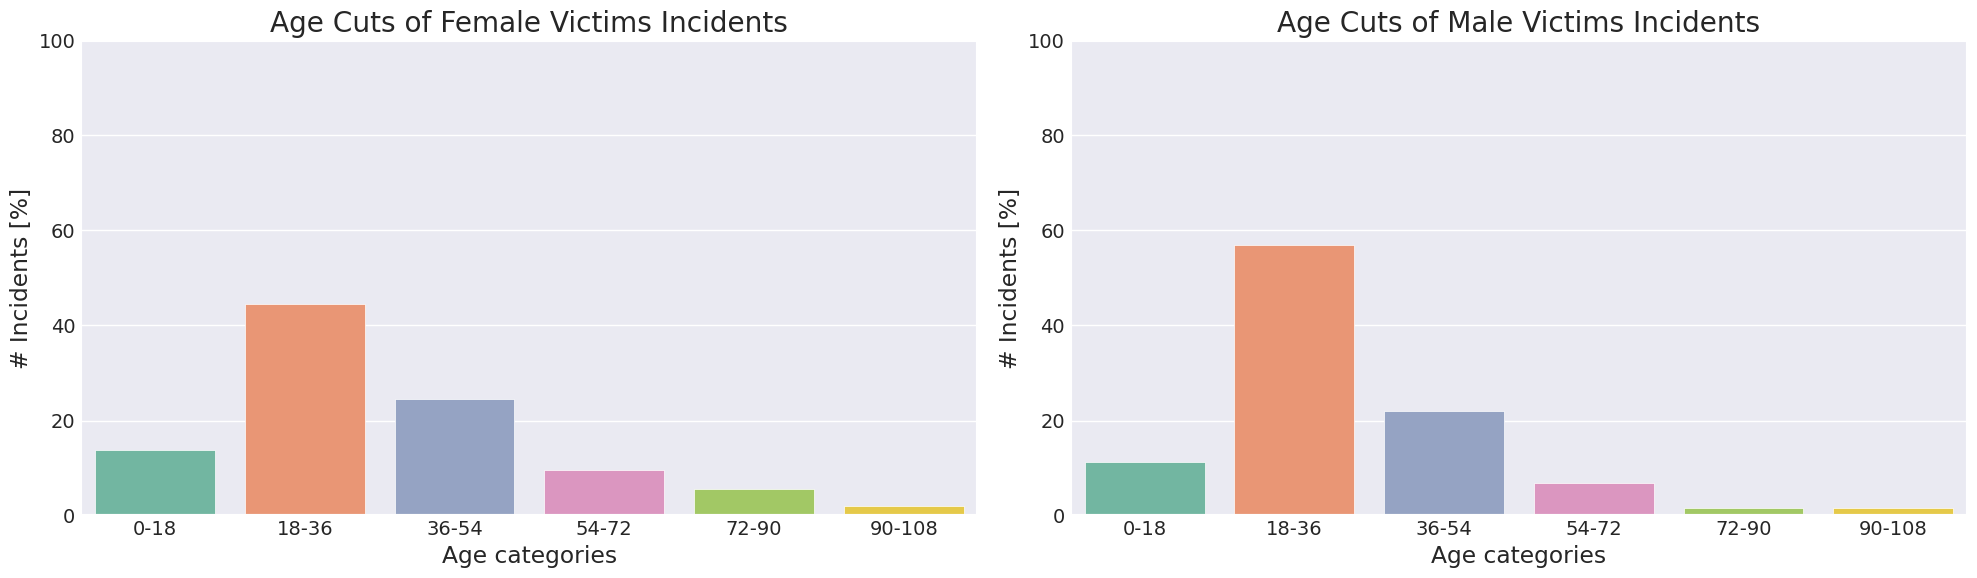

In [263]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(data=df_age_cut_victim_female, x=df_age_cut_victim_female.index,
            y=df_age_cut_victim_female['Incident_by_agecut']/sum(df_age_cut_victim_female['Incident_by_agecut'])*100, palette='Set2')
plt.xlabel('Age categories')
plt.ylabel('# Incidents [%]')
plt.title('Age Cuts of Female Victims Incidents')
plt.ylim(0,100)

plt.subplot(1,2,2)
sns.barplot(data=df_age_cut_victim_male, x=df_age_cut_victim_male.index,
            y=df_age_cut_victim_male['Incident_by_agecut']/sum(df_age_cut_victim_male['Incident_by_agecut'])*100, palette='Set2')
plt.xlabel('Age categories')
plt.ylabel('# Incidents [%]')
plt.title('Age Cuts of Male Victims Incidents')
plt.ylim(0,100)
plt.tight_layout()

It is again evident that the 18-36 age group is the group where most of the victims are and a similar distribution is obtained for the perpetrator.

### 2.6 Weapon used by perpetrator

In [264]:
df_weapon = df[['Perpetrator Sex', 'Victim Sex', 'Perpetrator Race', 'Victim Race',
                'Weapon', 'Incident','Perpetrator Age', 'Victim Age']]
df_weapon['Incident'] = 1

In [265]:
generate_pie_chart(names=df_weapon['Weapon'].value_counts().index, values=df_weapon['Weapon'].value_counts(),
                   title="Analysis of Weapon used in Homicides")

Pie chart of used weapons (where it is known) shows that most homicides are performed using Handguns, followed by Knife and Blunt Objects.

In [266]:
df_weapon['Weapon Groups'] = df_weapon['Weapon']
df_weapon = df_weapon.replace({'Weapon Groups': {'Rifle': 'Firearm', 'Shotgun': 'Firearm', 'Handgun': 'Firearm', 'Gun': 'Firearm'}})

In order for more consice data analysis all different firearms were merged under the same group.

In [267]:
interactive_plot_bar(df_weapon, 'Weapon Groups', 'Perpetrator Sex')

Cross-Table of Incidents in Perpetrator Sex by Weapon Groups: LHS: Frequency, RHS: Normalized



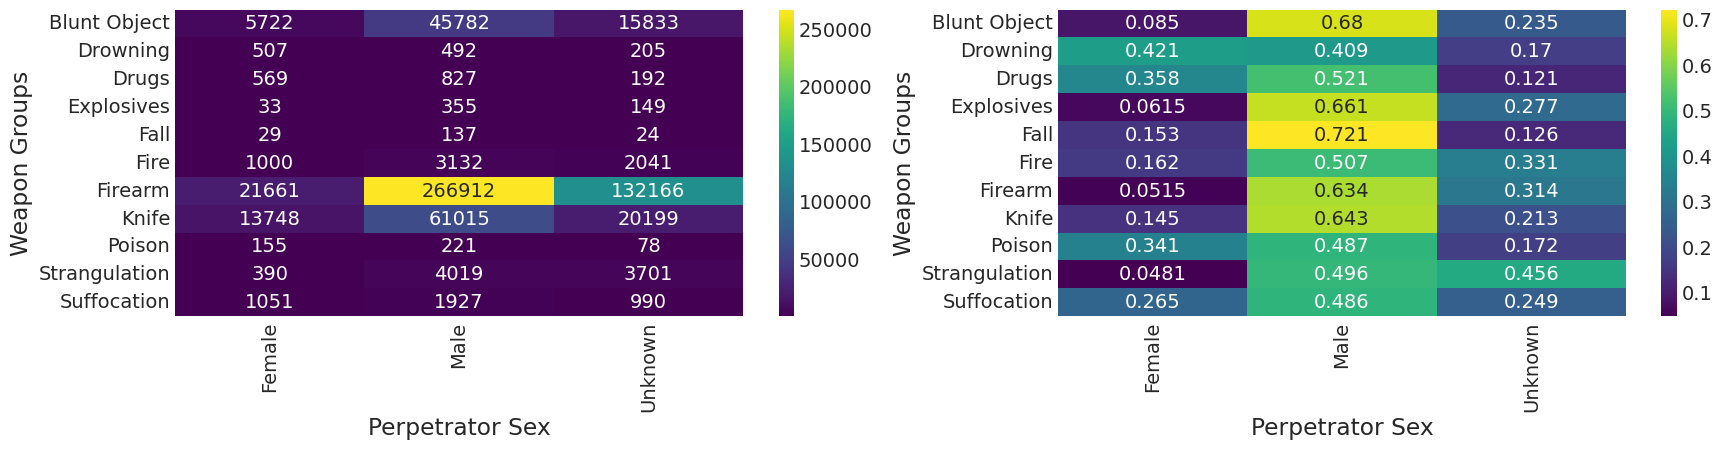

In [268]:
cross_table_heatmap(df_weapon[df_weapon['Weapon Groups']!='Unknown'], 'Perpetrator Sex', 'Weapon Groups')

Analysis of weapon groups used by different perpetrator sex shows that although male perpetrators are responsible for a significant higher count of homicides, some weapon groups are equally or relatively highly used by female perpetrators - Poison, Drowning, Drugs and Suffocation.

this is also described on this [article](https://www.washingtonpost.com/news/wonk/wp/2015/05/07/poison-is-a-womans-weapon/):

**"..With all guns removed, women are almost four times as likely as men to use poison...The only other weapon with a bigger difference is drowning, used seven times as much by women.."**

In [269]:
interactive_plot_bar(df_weapon, 'Weapon Groups', 'Perpetrator Race')

Cross-Table of Incidents in Perpetrator Race by Weapon Groups: LHS: Frequency, RHS: Normalized



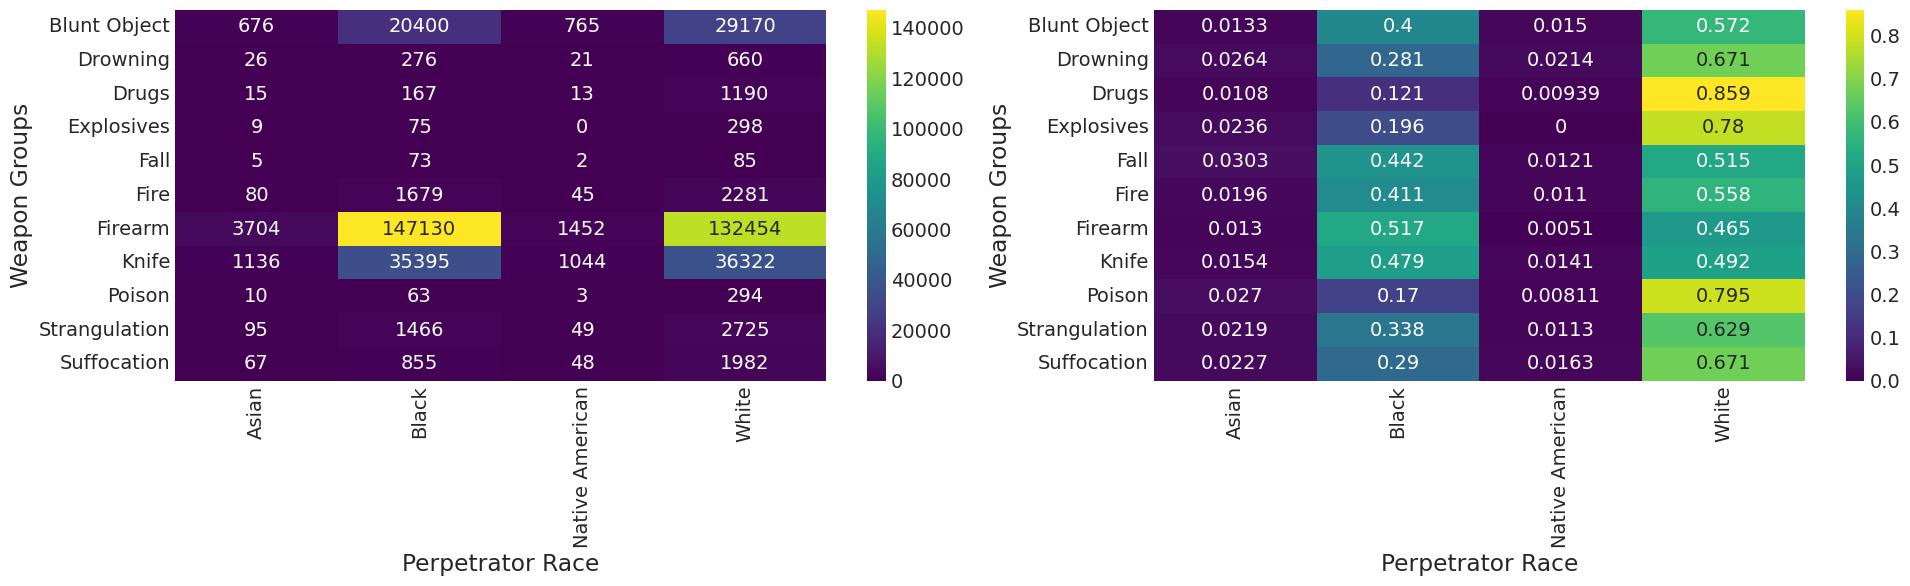

In [270]:
cross_table_heatmap(df_weapon[(df_weapon['Weapon Groups']!='Unknown')&(df_weapon['Perpetrator Race']!='Unknown')],
                    'Perpetrator Race', 'Weapon Groups', figsize=(20,10))

Looking at racial usage of different weapon groups, we can see that while Firearm and Knife are being used almost equally between white and black perpetrators, white perpetrators are the main users of methods like Drugs, Drowning, Explosives and Poison.

### 2.7 Relationship between perpetrator and victim

In [271]:
dist_relat_df = (df.groupby('Relationship').count().iloc[:,0]/df.groupby('Relationship').count().iloc[:,0].sum() * 100).reset_index()
dist_relat_df.rename(columns= {'Record ID': '%'}, inplace=True)
dist_relat_df.sort_values(by='%', ascending=False, inplace=True)

In [272]:
fig = px.bar(dist_relat_df, x="Relationship", y="%", color="Relationship",
             orientation="v",
             hover_name="Relationship", color_discrete_sequence=[
                 x for x in px.colors.qualitative.Plotly
                 ],
             text=['%.2f' %(round(v,2)) + '%' for v in dist_relat_df['%']],
             width= 1000, height=600,
             title='Relationship between Perpetrator and Victim',
             )
fig.update_traces(showlegend=False)
fig.show()

Distribution of the incidents by the perpetrator-victim relationships, most murders are directed toward Acquaintances and Strangers, followed by Wife Friend and Girlfriend, and then other family members.

In [273]:
df['Relationship Groups'] = df['Relationship']

In [274]:
df = df.replace({'Relationship Groups': {'Employee': 'Work', 'Employer': 'Work'}})
df = df.replace({'Relationship Groups': {'Neighbor': 'Acquaintance', 'Friend': 'Acquaintance'}})
df = df.replace({'Relationship Groups': {'Wife': 'Romantic Partner', 'Husband': 'Romantic Partner',
                                         'Common-Law Wife': 'Romantic Partner', 'Common-Law Husband': 'Romantic Partner',
                                         'Girlfriend': 'Romantic Partner', 'Boyfriend': 'Romantic Partner',
                                         'Boyfriend/Girlfriend': 'Romantic Partner',
                                         }
                 })
df = df.replace({'Relationship Groups': {'Son': 'Family', 'Daughter': 'Family',
                                         'Brother': 'Family', 'Father': 'Family', 'Mother': 'Family',
                                          'Sister': 'Family',
                                         }
                 })
df = df.replace({'Relationship Groups': { 'Stepfather': 'Stepfamily',
                                         'Stepson': 'Stepfamily',
                                         'Stepdaughter': 'Stepfamily',
                                         'Stepmother': 'Stepfamily'
                                         }
                 })
df = df.replace({'Relationship Groups': {'Ex-Wife': 'Ex-Spouse','Ex-Husband': 'Ex-Spouse'}})

For a concise feature analysis, several relationships between the perpetrator and the victim were gathered under one heading. For example:
1. Sister, Father, Mother, etc. under **Family**.
2. Neighbor and Friend under **Acquaintances**.
3. Employee and Employer under **Work**.
4. Boyfriend, Girlfriend, wife, etc. under **Romantic Partner**.
5. Stepfather, Stepson, etc. under **Stepfamily**.
6. Ex-Wife and Ex-Husband under **Ex-Spouse**.

In [275]:
df['Relationship Groups'].unique()

array(['Acquaintance', 'Unknown', 'Romantic Partner', 'Stranger',
       'Ex-Spouse', 'Family', 'Stepfamily', 'In-Law', 'Work'],
      dtype=object)

In [276]:
df_relationship = df[['Perpetrator Sex', 'Victim Sex', 'Perpetrator Race', 'Victim Race', 'Relationship Groups', 'Weapon', 'Incident']]
df_relationship['Incident'] = 1
for col in df_relationship.columns:
  df_relationship = df_relationship[df_relationship[col].astype(str).str.contains("Unknown") == False]
df_relationship.reset_index(inplace=True)

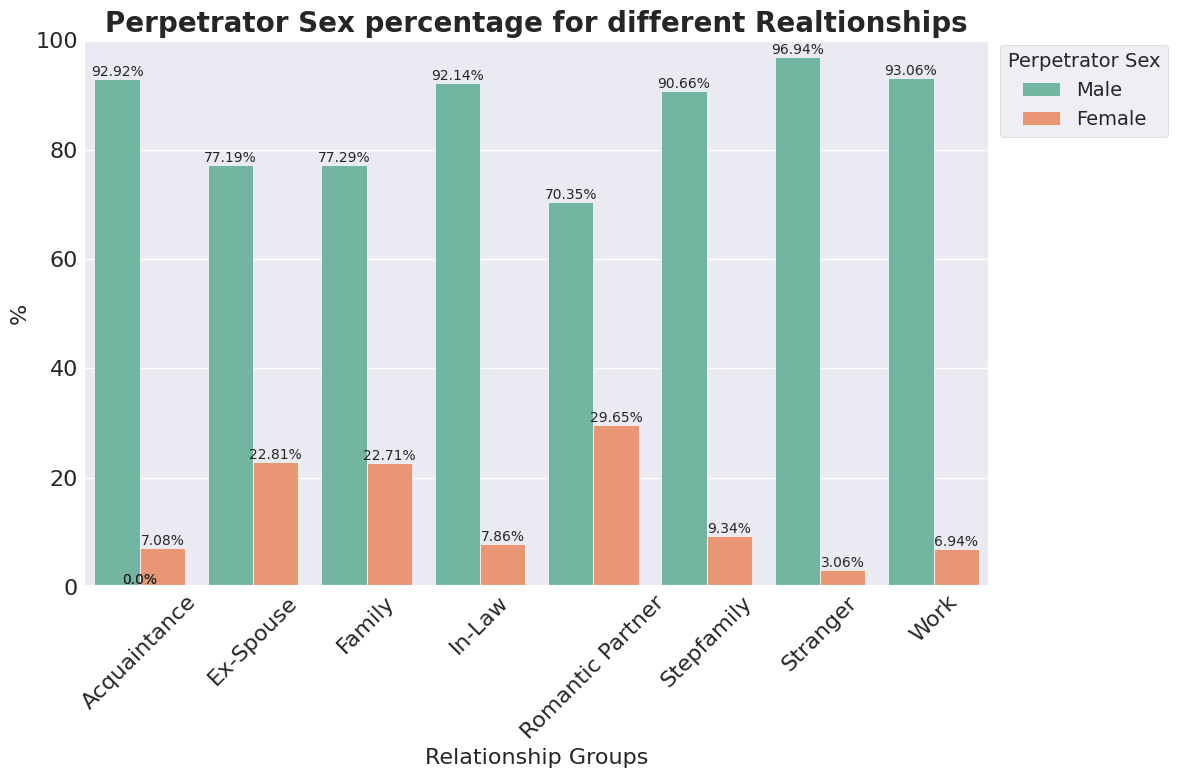

In [277]:
bar_plot_percentage(df_relationship, 'Relationship Groups', 'Perpetrator Sex',
                    title='Perpetrator Sex percentage for different Realtionships')

Cross-Table of Incidents in Relationship Groups by Perpetrator Sex: LHS: Frequency, RHS: Normalized



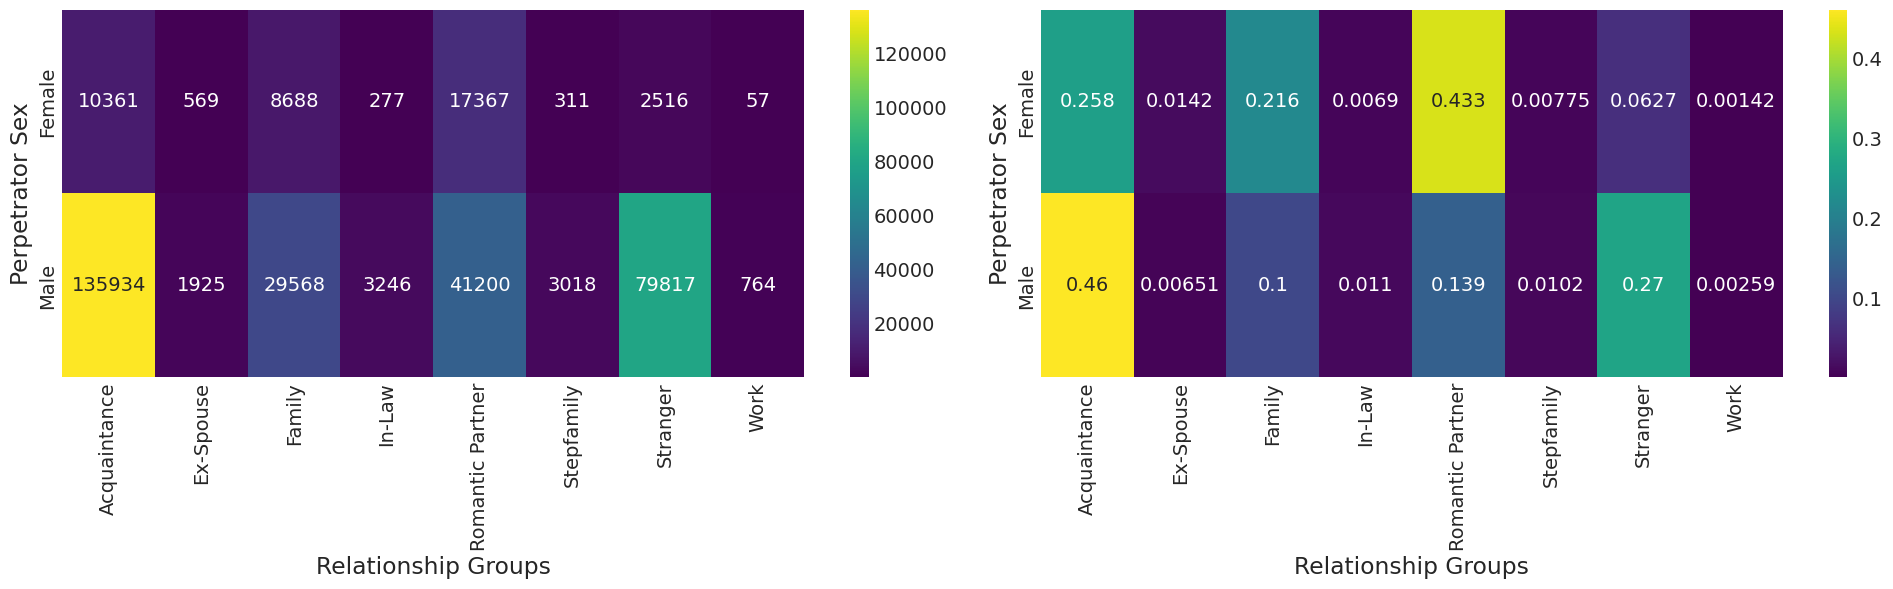

In [278]:
cross_table_heatmap(df_relationship, 'Relationship Groups', 'Perpetrator Sex', figsize=(20,10))

From the graphs above, it seems that although homicide is predominantly male perpetrated, male perpetrators kill relatively higher count of Strangers and Acquanintances outside of their close circle while when female perpetrators kill, it's mainly their Romantic Partners or familiy members.

This fact has 3 main explanations:

The first reason is that women tends to kill for **gain**, for insurance payouts, assets, or due to being removed from a will following a divorce, thus, women are more involved in killing their partners.

Second reason asscosiates with what they perceived as **"love"**, which for the most part targeted those closest to them in order to remove the victim from a situation perceived by the offender as "worse than death", as presented in the following [article](https://www.abc.net.au/news/2018-02-05/female-murderers-more-likely-motivated-by-love-financial-gain/9378404).

The third, and most common explanation, is that the homicides are done as a **reaction to physical abuse, rape, murder threats** directed to them by their partners and in self defense cases, as presented in the followintg [article](https://www.encyclopedia.com/reference/encyclopedias-almanacs-transcripts-and-maps/when-women-kill-their-partners);

**"...However, when women do kill, they are most likely to kill an intimate partner or other family member..."**


In [279]:
df['Age Difference'] = df['Perpetrator Age'] - df['Victim Age']

Now we can look back on the histogram of age difference between female perpetrators and their victims and understand the difference between male and female victims.

When the victim is male we get the huge peak around 0 resulting from the Romantic Partner homicicdes seconded by the peak of Family (children).

But due to low female female reltionship counts, when the Victim Sex is female as well, the dominating peak that's being left is of family (or children to be more percise)

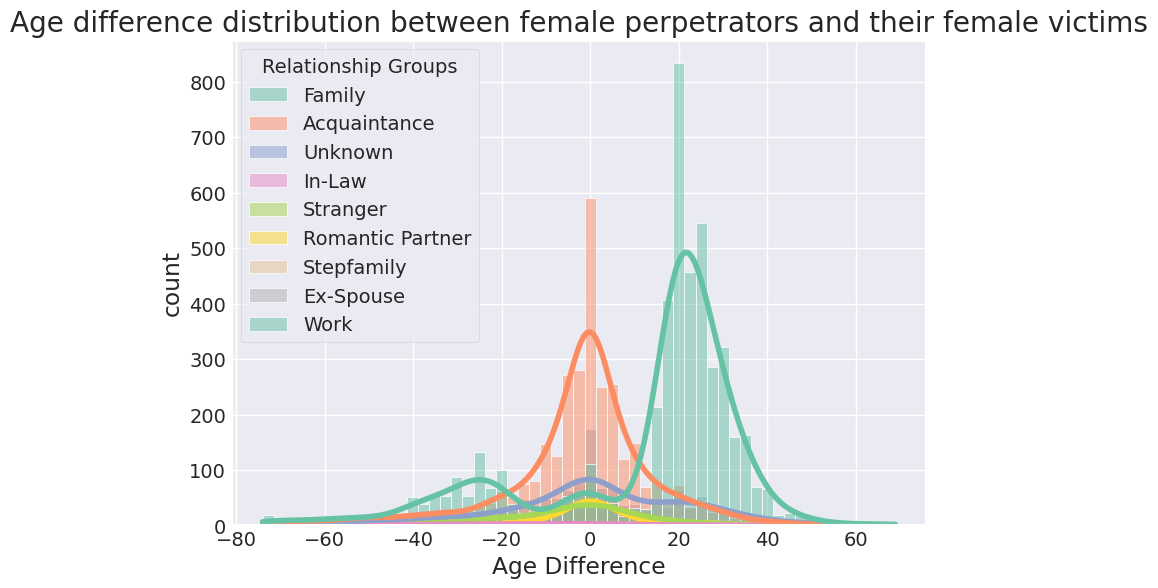

In [280]:
hist_plot(df[(df['Perpetrator Sex']=='Female')&(df['Victim Sex']=='Female')&(df['Age Difference']>-75)],'Age Difference',hue_col='Relationship Groups',
          custom_title='Age difference distribution between female perpetrators and their female victims')

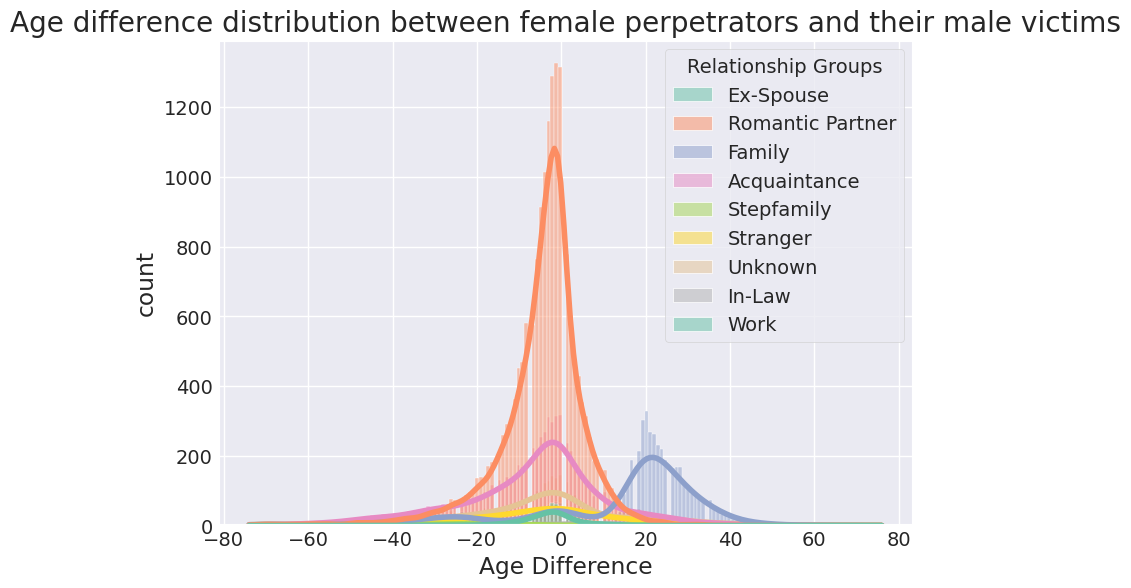

In [281]:
hist_plot(df[(df['Perpetrator Sex']=='Female')&(df['Victim Sex']=='Male')&(df['Age Difference']>-75)],'Age Difference',hue_col='Relationship Groups',
          custom_title='Age difference distribution between female perpetrators and their male victims')

Cross-Table of Incidents in Relationship Groups by Perpetrator Race: LHS: Frequency, RHS: Normalized



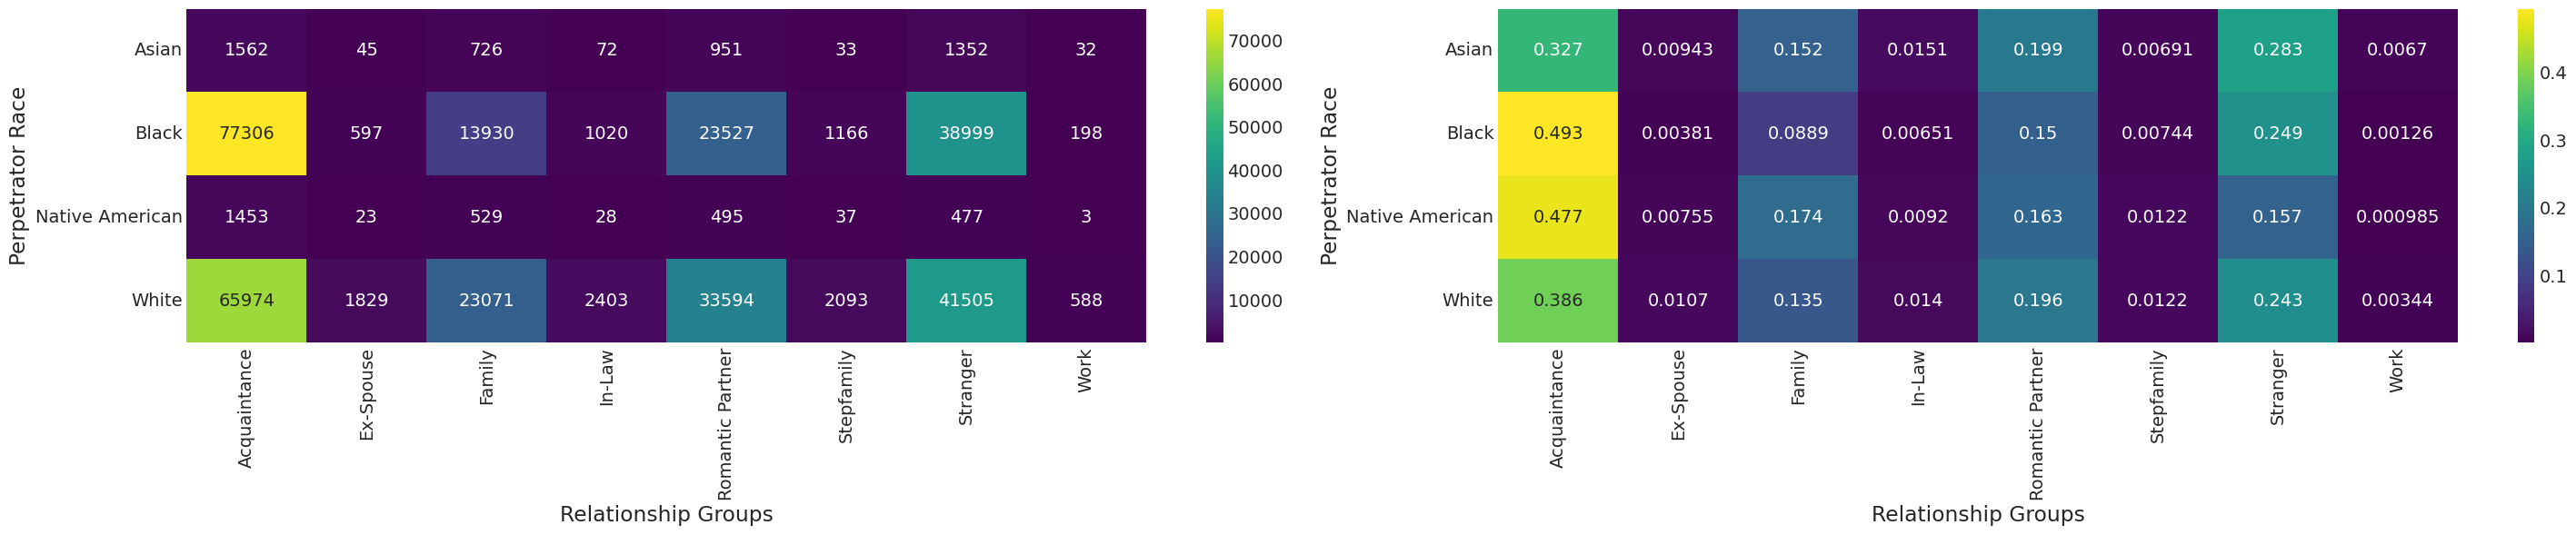

In [282]:
cross_table_heatmap(df_relationship, 'Relationship Groups', 'Perpetrator Race', figsize=(30,10))

When the racial comparison is made in the commission of crimes when the relationship between the perpetrator and the victim is known, it is evident that there is no substantial difference in cases where the number of crimes is high (i.e., acquaintances or strangers) and that the distribution is almost equally divided between white and black.
On the other hand, in the cases of crimes in a family, work or romantic partners, it seems that the crimes are mainly committed by whites between 60-70%.

In [283]:
df_relationship['Weapon Groups'] = df_relationship['Weapon']
df_relationship = df_relationship.replace({'Weapon Groups': {'Rifle': 'Firearm', 'Shotgun': 'Firearm', 'Handgun': 'Firearm', 'Gun': 'Firearm'}})

Grouped all firearm under the same group: rifle, handgun, shotgun etc..
Assuming that Explosives, and fire are at different criteria.

Cross-Table of Incidents in Relationship Groups by Weapon Groups: LHS: Frequency, RHS: Normalized



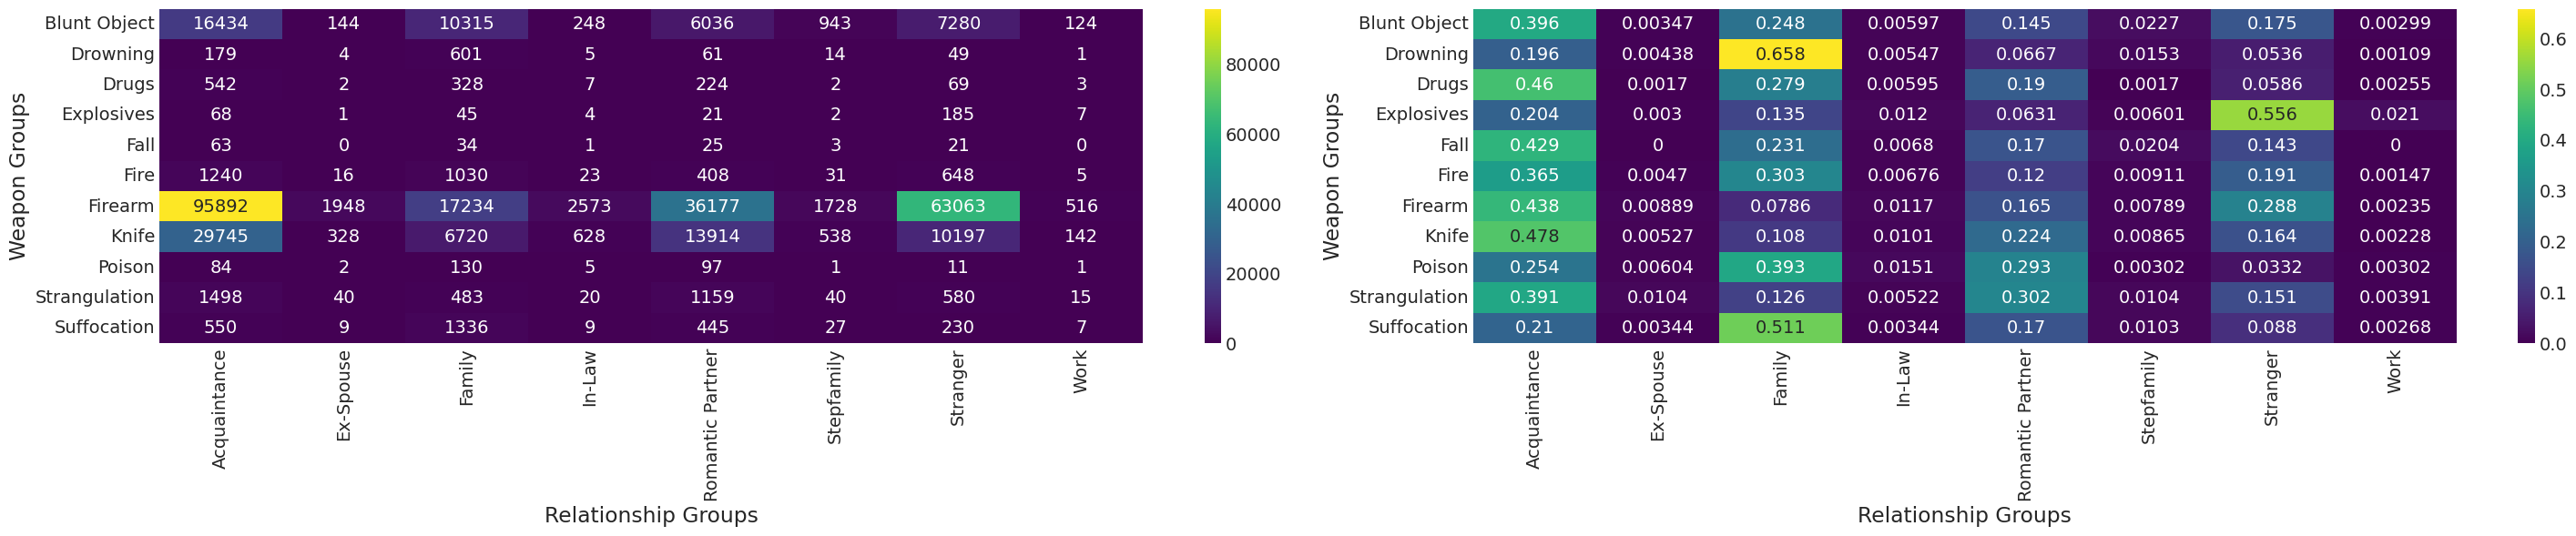

In [284]:
cross_table_heatmap(df_relationship, 'Relationship Groups', 'Weapon Groups', figsize=(30,10))

We can see some intersting findings when looking at the relationship between weapon groups and perpetrator-victim relationship.

Drowning and suffocation seems to be highly directed towards family members, while bombing is directed mainly at strangers.

Poison and strangulation seems to be exccesively used in romantic partners homidices followed by knife.

### 2.8 Incidents per year and season



In [285]:
df['Year DT'] = pd.to_datetime(df['Year'].astype(str),format='%Y')

In [286]:
time_trend(df[df['Perpetrator Sex']!='Unknown'],'Year DT','Perpetrator Sex')

Looking at year trend for records count per year we can again see that male perpetrators are much more common then female ones.

In [287]:
time_trend(df[df['Perpetrator Sex']!='Unknown'],'Year DT','Perpetrator Sex',normalize=True)

In order to see the trends in a clearer and moe comparable way, we can look at each of the perpetrator sex groups data normalized per their relative maximum number. Doing so we can see that while femlae perpetrator incident are in were in constant decline from 1980 to 2000, male perpetrator incident count saw an increase from 1988 to 1993 and still hasn't declined to the same relative level female perpetrator incidents have.

In [288]:
time_trend(df[df['Victim Sex']!='Unknown'],'Year DT','Victim Sex',normalize=True)

Looking at the normalized homicides per victim sex time trend, we can see that 1993 was the year with most male and female victims, which correlates well with the fact that we found in the previous 2 graphs seeing that 1993 was the year with most homicides count done by male perpetrators.

In [289]:
df['Weapon Groups'] = df['Weapon'].replace({'Rifle': 'Firearm', 'Shotgun': 'Firearm', 'Handgun': 'Firearm', 'Gun': 'Firearm'})

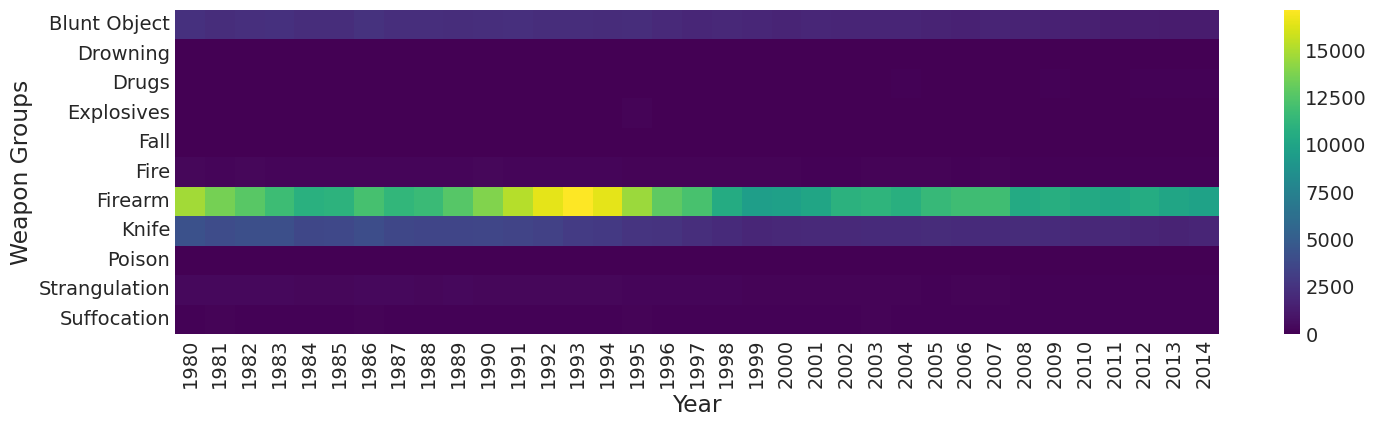

In [290]:
ct  = pd.crosstab(df[df['Weapon Groups']!='Unknown']["Weapon Groups"], df["Year"],)
fig = plt.figure(figsize=(15,4))
sns.heatmap(ct,cmap="viridis")
fig.show()

Looking at weapon group usage per year we can see that firearm is being used significantly more than other weapon, again with the expected maximum value on 1993. Second most used weapon is Knife and then Blunt object.

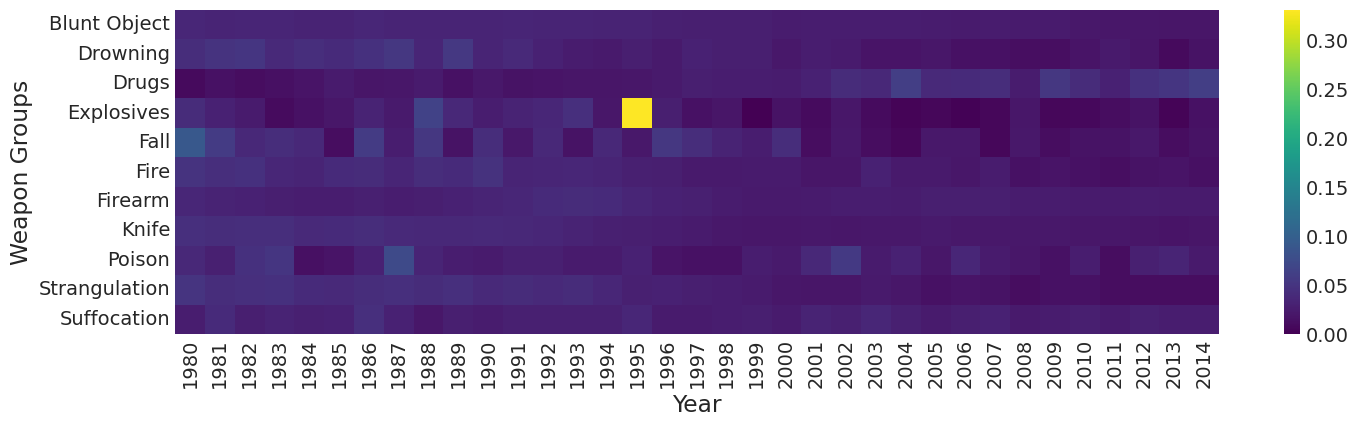

In [291]:
ct  = pd.crosstab(df[df['Weapon Groups']!='Unknown']["Weapon Groups"], df["Year"], normalize='index')
fig = plt.figure(figsize=(15,4))
sns.heatmap(ct,cmap="viridis")
fig.show()

Looking on the normalized heatmap in order to check for abnormalities and trends within the same weapon group it immediately jump out that there was an abnormality in Explosives usage on 1995. Let's try and found out if it's real.

In [292]:
df[(df['Year']==1995)&(df['Weapon Groups']=='Explosives')].groupby(['Month'])['Record ID'].count()

Month
April        154
August         1
December       4
January        5
July           2
March          2
May            1
November       4
September      5
Name: Record ID, dtype: int64

In [293]:
df[(df['Year']==1995)&(df['Weapon Groups']=='Explosives')&(df['Month']=='April')].groupby(['City'])['Record ID'].count()

City
Oklahoma      153
Sacramento      1
Name: Record ID, dtype: int64

After a short google search for 'April 1995 Oklahoma bombing' we've found the following extreme real case of [Oklahoma City Bombing](https://www.fbi.gov/history/famous-cases/oklahoma-city-bombing).

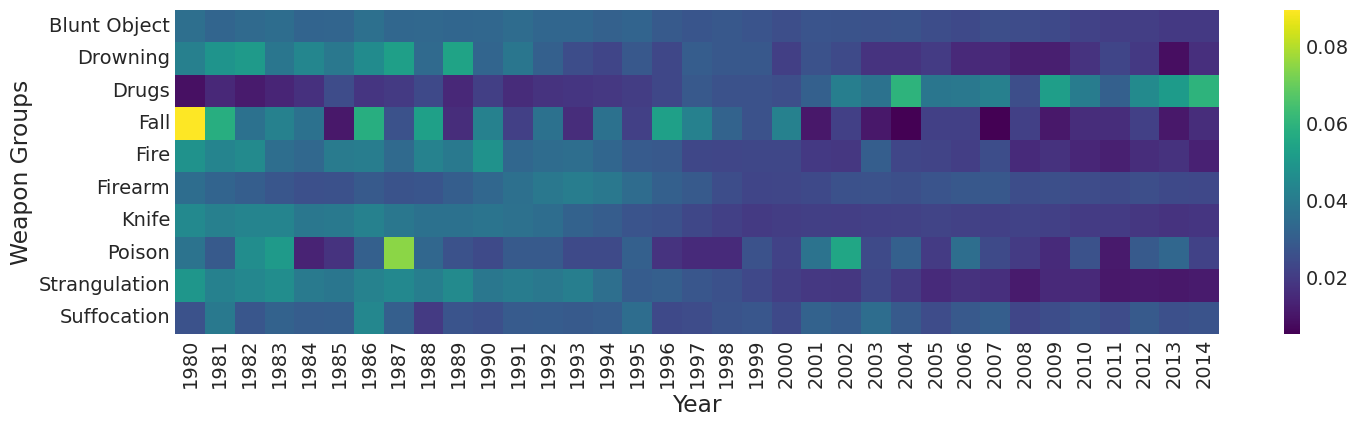

In [294]:
ct  = pd.crosstab(df[(df['Weapon Groups']!='Explosives')&(df['Weapon Groups']!='Unknown')]["Weapon Groups"], df["Year"], normalize='index')
fig = plt.figure(figsize=(15,4))
sns.heatmap(ct,cmap="viridis")
fig.show()

Looking at the normalized weapon groups count over the years without the explosives extreme data, we can see some interesting pieces of data. Some homicide methods saw a constans decrease in use such as Blunt Object, Drowning, Knife  and Strangulation, while Drugs for example saw a recent sharp increase in use.

Looking at the sharp Poison increase in 1987, by repeating the same analysis done above with the following steps of **'Poison' & '1987'** -> **'September'** -> **'Hamilton'**, has led us to find an additional interesting [extreme poisioning homicide case](https://www.washingtonpost.com/archive/politics/1987/08/21/orderly-served-death-to-patients/a69920ed-78d5-4a15-b0f8-74003cb5b326/).

In [295]:
conditions = [(df['Month']=='June')|(df['Month']=='July')|(df['Month']=='August'),
              (df['Month']=='September')|(df['Month']=='October')|(df['Month']=='November'),
              (df['Month']=='December')|(df['Month']=='January')|(df['Month']=='February'),
              (df['Month']=='March')|(df['Month']=='April')|(df['Month']=='May')]
choices = ['Summer','Autumn','Winter','Spring']
df['Seasons'] = np.select(conditions, choices)

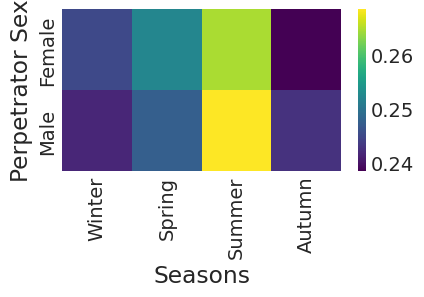

In [296]:
ct  = pd.crosstab(df[df['Perpetrator Sex']!='Unknown']["Perpetrator Sex"], df["Seasons"], normalize='index')
fig = plt.figure(figsize=(4,2))
sns.heatmap(ct[['Winter','Spring','Summer','Autumn']],cmap="viridis")
fig.show()

Looking at homicides count per season, we can see that Summer is the season with the significantly higher homicide rate then rest of the year for both Male and Female perpetrators, which is a [well known phenomena](https://www.nytimes.com/2018/09/21/upshot/a-rise-in-murder-lets-talk-about-the-weather.html) related to the higher temperatures during these months.

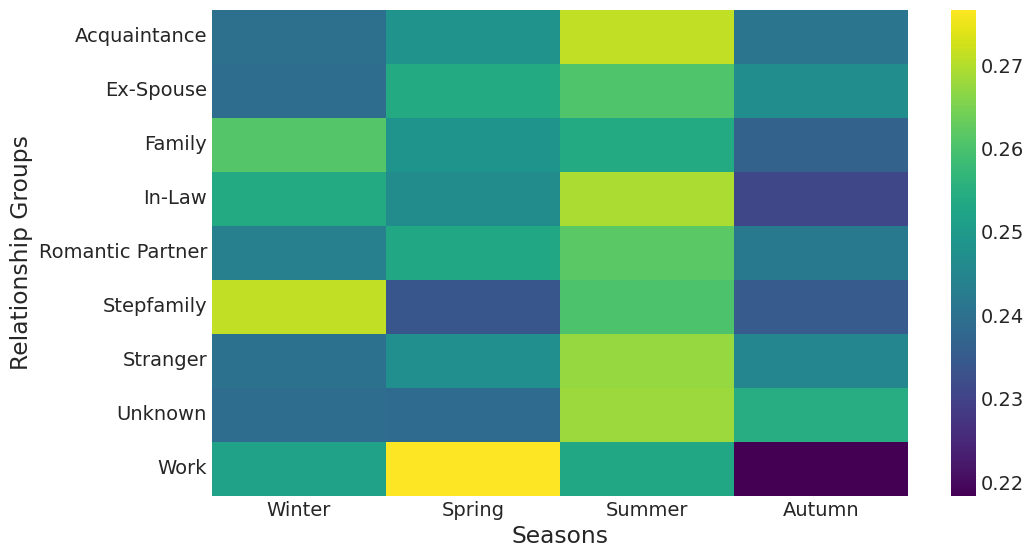

In [297]:
ct  = pd.crosstab(df["Relationship Groups"], df["Seasons"], normalize='index')
fig = plt.figure(figsize=(10,6))
sns.heatmap(ct[['Winter','Spring','Summer','Autumn']],cmap="viridis", annot=False)
fig.show()

Inspecting the reltionship between the perpetrator and the victim correlation to time of year, shows that interestingly work related homiciced happen more during Spring instead of during summer, which can be explained by the fact that a lot of workers are on vacation during the summer.

It can also be seen that Family related homiciced are high during the winter as well possibly as familiy members meets each other in the house during the cold month as well so summer increase is less significant.

### 2.9 Incidents per state and city

In [298]:
usa_city = pd.read_csv("/content/uscities.csv")
cols = ['city', 'state_id', 'state_name', 'county_name', 'lat', 'lng', 'population']
cities_usa_new = usa_city[cols]
cities_df = df.groupby(["City", 'State']).size().to_frame(name='count').reset_index()
cities_df.rename(columns={"City": "city", 'State': 'state_name'}, inplace=True)
df_usmap = pd.merge(cities_df, cities_usa_new, how='inner', on=['city', 'state_name'])

In [299]:
us_state_city_map_incidents(df_usmap, scale=10)

In [300]:
us_state_city_map_incidents(df_usmap, scale=0.001, norm=True)

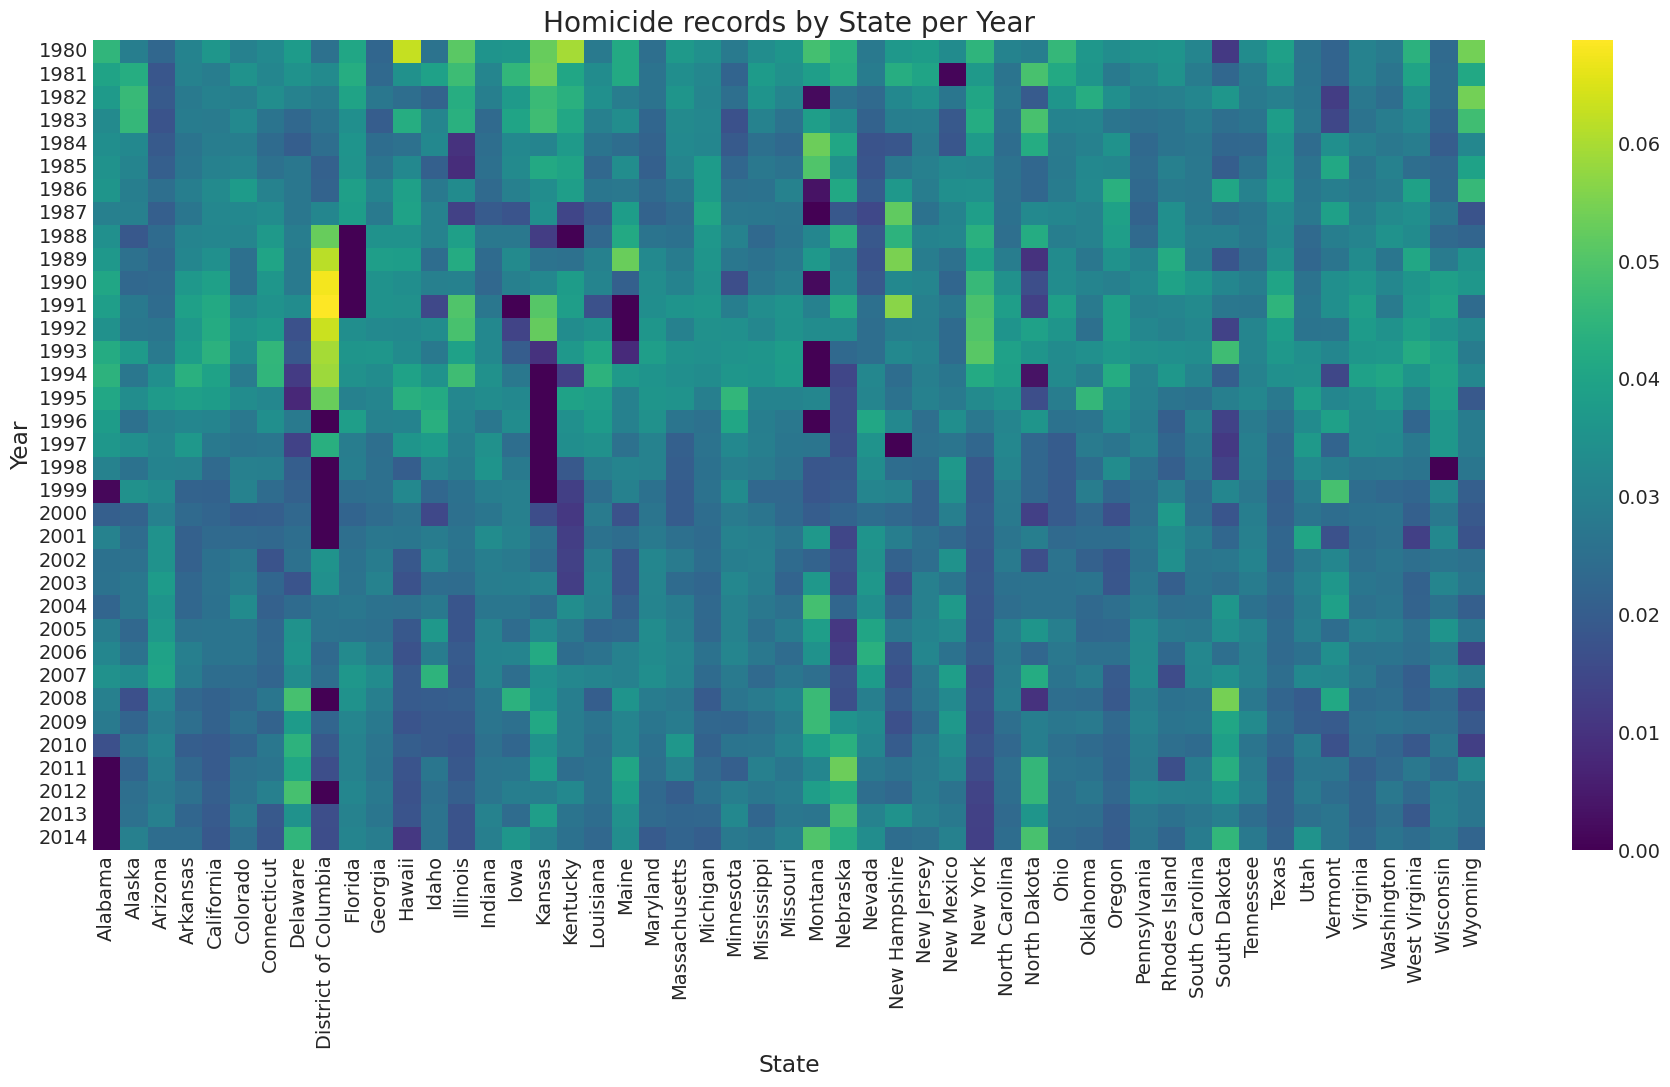

In [301]:
ct  = pd.crosstab(df["Year"], df["State"],normalize='columns')
plt.figure(figsize=(20,10))
sns.heatmap(ct,cmap="viridis")
plt.title("Homicide records by State per Year")
plt.show()

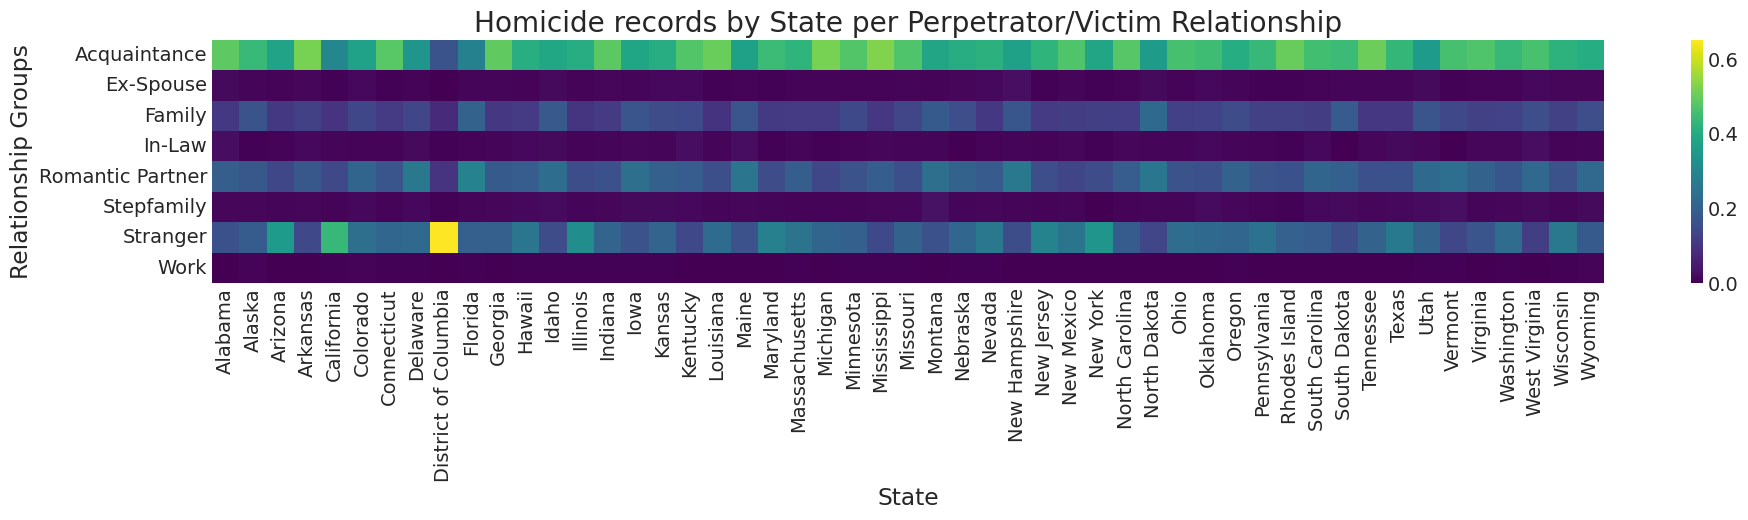

In [302]:
ct  = pd.crosstab(df[df['Relationship Groups']!='Unknown']["Relationship Groups"], df["State"],normalize='columns')
plt.figure(figsize=(20,3))
sns.heatmap(ct,cmap="viridis")
plt.title("Homicide records by State per Perpetrator/Victim Relationship")
plt.show()

The main finding that pops up is the killins streak years of 1988-1995 in District of Columbia, which is also the only state with extreme relative number of homicides of strangers.

Let's run a short investigation:

In [303]:
pd.crosstab(df[(df['Relationship Groups']!='Unknown')&(df['State']=='District of Columbia')&(df['Year']<=1995)&(df['Year']>=1988)&(df['Relationship']=='Stranger')]['Perpetrator Race'],
            df['Victim Race']).style.background_gradient(cmap='viridis', axis=None)

In [304]:
pd.crosstab(df[(df['Relationship Groups']!='Unknown')&(df['State']=='District of Columbia')&(df['Year']<=1995)&(df['Year']>=1988)&(df['Relationship']=='Stranger')]['Perpetrator Race'],
            df['Weapon Groups']).style.background_gradient(cmap='viridis', axis=None)

It seems like the homicides were perofrmed mainly by black perpertrators to black victims using Firearms. Short google search led us to this article on late 1980s to early 1990s [D.C. Crack Wars](https://www.latimes.com/archives/la-xpm-1989-03-26-mn-939-story.html):

**"...Almost every night, street scuffles end with a burst of gunfire, the shriek of sirens and yet another young black man turned corpse..."**

# 3 - Unresolved cases with respect to race, record source, city, weapon, relationship



In [305]:
# Total incidents- categorical features
df_cat = pd.DataFrame(data = df.dtypes, columns = ['type']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['type'] == 'object'])
df_cat = df[cat_var]
victim_age_groups = pd.cut(x=df['Victim Age'], bins=np.arange(0,120,18)).astype('object')
perpetrator_age_groups = pd.cut(x=df['Perpetrator Age'], bins=np.arange(0,120,18)).astype('object')
df_cat['Victim Age Groups'] = victim_age_groups
df_cat['Perpetrator Age Groups'] = perpetrator_age_groups
df_cat[['Year', 'Victim Count', 'Perpetrator Count', 'Incident', 'Incident_by_agecut']] = df[['Year', 'Victim Count', 'Perpetrator Count', 'Incident', 'Incident_by_agecut']]

In [306]:
# Usolved Cases ('Crime solved' == ''No')
df_unsolved = df[df['Crime Solved'] == 'No']
df_unsolved['Victim Age Groups'] = df_cat[df_cat['Crime Solved'] =='No']['Victim Age Groups']
df_unsolved['Perpetrator Age Groups'] = df_cat[df_cat['Crime Solved'] =='No']['Perpetrator Age Groups']
df_unsolved['Perpetrator Age'] = pd.to_numeric(df_unsolved['Perpetrator Age'], errors='coerce')
df_unsolved.loc[634666,'Perpetrator Age'] = 0
df_unsolved = df_unsolved.fillna('Unknown')

In [307]:
_,_=norm_df_by_feature(df_cat, df_unsolved, 'Victim Age Groups', figure=True)

Although the amount of incidents for the elderly groups (72-90 and 90-108) is significantly small compared to the 18-36 age group, it seems that the most unsolved cases appear with these elder groups.

In [308]:
_,_=norm_df_by_feature(df_cat, df_unsolved, 'Weapon Groups', figure=True)

This figure basically shows that murderes don't get caught (i.e., cold\unsolved cases) when their killing weapon is either strangulation or fire or explosives propbably because these weapon almost don't leave trace of the perpetratorr identity. Firearm is also appear with high ratio since this is the main weapon used for homocides.
Later, we will see the relation between strangulation and the elder groups victims.

In [309]:
_,_=norm_df_by_feature(df_cat, df_unsolved, 'Agency Type', figure=True)

This figure presents the unsolved cases with respect to the investigating agency type. From the bar plot, it percives that Municipal Police has most unsolved cases together with the Special Police. The first can be explained by the amount of cases Municipal Police is dealing with, thus the high ratio of the unsolved cases. It is also worth noting that the number of cold cases held by an agency is dependent on a variety of factors, including resources, funding, and jurisdictional considerations, where these agencies suffer from low budget compare to Regional and State Police. The high ratio of the latter, Special Police, is probably beacuse dealing with special cases, where solving or finding the perpetrator is complicated.
The followings are articles descirbing the effect of police size or jurisdiction on crime solving:
[1.](https://www.washingtonpost.com/nation/2021/05/08/most-police-departments-america-are-small-thats-partly-why-changing-policing-is-difficult-experts-say/) ,
[2.](https://www.themarshallproject.org/2015/04/02/why-are-american-cops-so-bad-at-catching-killers)


In [310]:
_,_=norm_df_by_feature(df_cat, df_unsolved, 'Victim Race', figure=True)

This figure is interesting, as it emphasizes the unsolved cases where victim race is Black. Moreover, Asians are also a population with high unsolved rate with compare to the low amount of the incidents reported.

In [311]:
_,_=norm_df_by_feature(df_cat, df_unsolved, 'State', figure=True)

This bar plot presents the distribution of unsolved cases across states. Although the district of columbia is a small state, compared to New York or Maryland, Illinois, California etc..
It has the highest rate of unsolved cases by a wide margin than the next state (New York), more than 40 percent. This gap can be attributed to the drug wars that took place in the country between the 1980s and 1990s, which claimed many victims, most of which have not been resolved.

**The purpose of the following matrices is to describe the probability that two features may occur for the cases of unsolved murders**

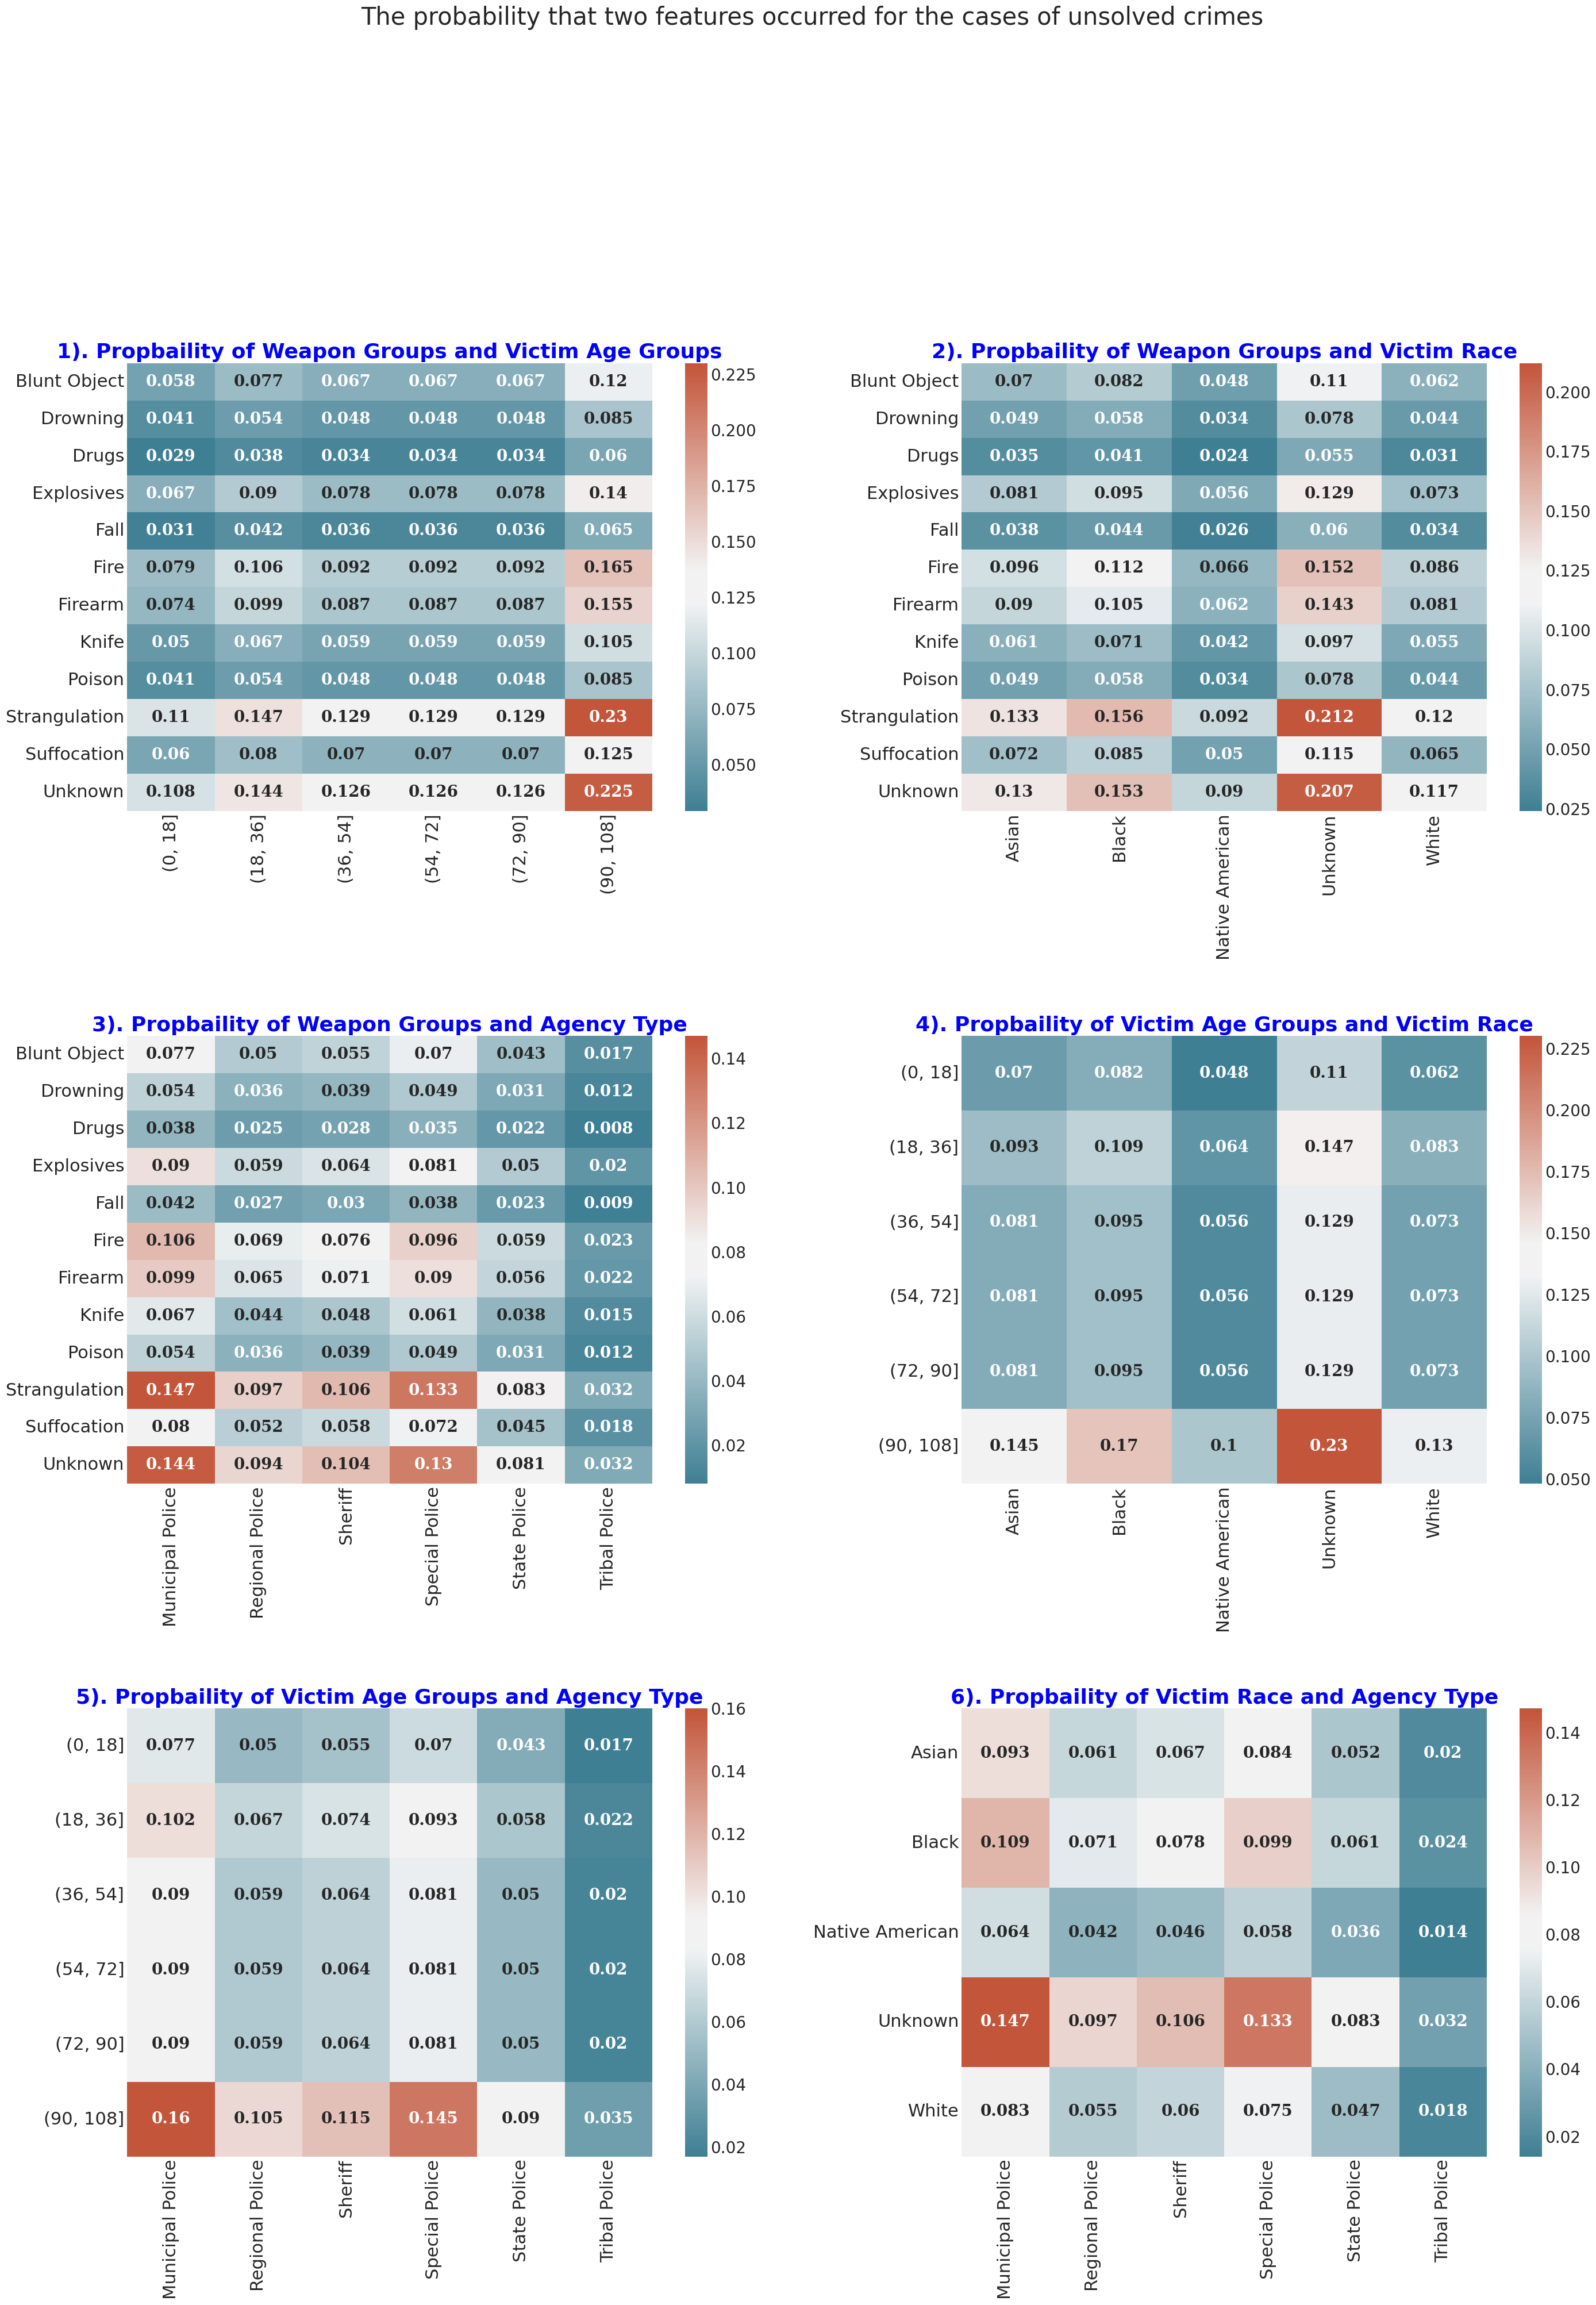

In [312]:
features_2_test = ['Weapon Groups', 'Victim Age Groups','Victim Race', 'Agency Type']
propability_of_multi_feature(df_cat, df_unsolved, features_2_test, figsize=(30,70))

**Figure 1** illustrates what was shown earlier, that criminals get away from murder cases when it comes to the elderly age groups and when the murder weapon is strangulation (e.g., curtain cord) or suffocation (e.g., a pillow, a plastic bag). Attached is an [article](https://www.aarp.org/politics-society/advocacy/info-2022/texas-elder-murders.html) describing a serial killer in Texas, where the victim age group was elderly people, and whose killing method was by strangulation and suffocation.

**Figure 2** presents that the combination of Black victims and strangulation as the killing weapon is the highest propability of unsolved crime. As aformentioned above, Asians are also a population group where unsolved crime rate is high, especially when the crime was commited with strangulation. The representation of fire and firearms can be seen as murderous tools of black victims. While fire destroys evidence and therefore perhaps the difficulty in solving the case, the firearm is a reminder of the drug wars we described earlier.

**Figure 3**  depicts that municipal police and special police are the agencies with the highest representation of unsolved cases over a fairly wide range of possible murder instruments, while strangulation is the murder weapon with the highest chance of not being solved in all agencies. Therefore, if you want a solved murder case, the highest chance is to contact either the regional police or the state police.

**Figure 4 & 5 & 6** basically show that it is not recommended to get murdered if you are black and over 90 years old and your case is handeled by Municipal Police or Special Police, as these cases have the most chances to remain unsolved.

